# Project Sales Prediction 

***
## 1. Read the data as time series objects in R. Plot the data. What are the major features you notice in the series? How do the two series differ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.dpi'] = 200

### Before we start we need some work to be done in excel.
- Create 'Date' column with Date(Year,Month,Date) formula from excel taking year and month and '01' date for all dates.
- Delete extra sheets and save the file as csv.

In [3]:
path="C:/Users/gusingev/Documents/PGPBABI/Time Series Forecasting/project/demand.csv"
data=pd.read_csv(path,parse_dates=['Date'], index_col='Date')

In [4]:
data.index

DatetimeIndex(['2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01',
               ...
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01'],
              dtype='datetime64[ns]', name='Date', length=187, freq=None)

#### Notice the dtype=’datetime[ns]’ which confirms that it is a datetime object.<br>
Now we will create two diffrent time seris object for two product as Item A = tsa and Item B = tsb

In [5]:
tsa = pd.Series(data.iloc[:,2], pd.date_range('2002-01-01', periods=len(data.index), freq='MS'))
tsb = pd.Series(data.iloc[:,3], pd.date_range('2002-01-01', periods=len(data.index), freq='MS'))

In [6]:
tsa.index

DatetimeIndex(['2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01',
               ...
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01'],
              dtype='datetime64[ns]', length=187, freq='MS')

In [7]:
tsa['2016']

2016-01-01    2265
2016-02-01    3685
2016-03-01    3754
2016-04-01    3708
2016-05-01    3210
2016-06-01    3517
2016-07-01    3905
2016-08-01    3670
2016-09-01    4221
2016-10-01    4404
2016-11-01    5086
2016-12-01    5725
Freq: MS, Name: Item A, dtype: int64

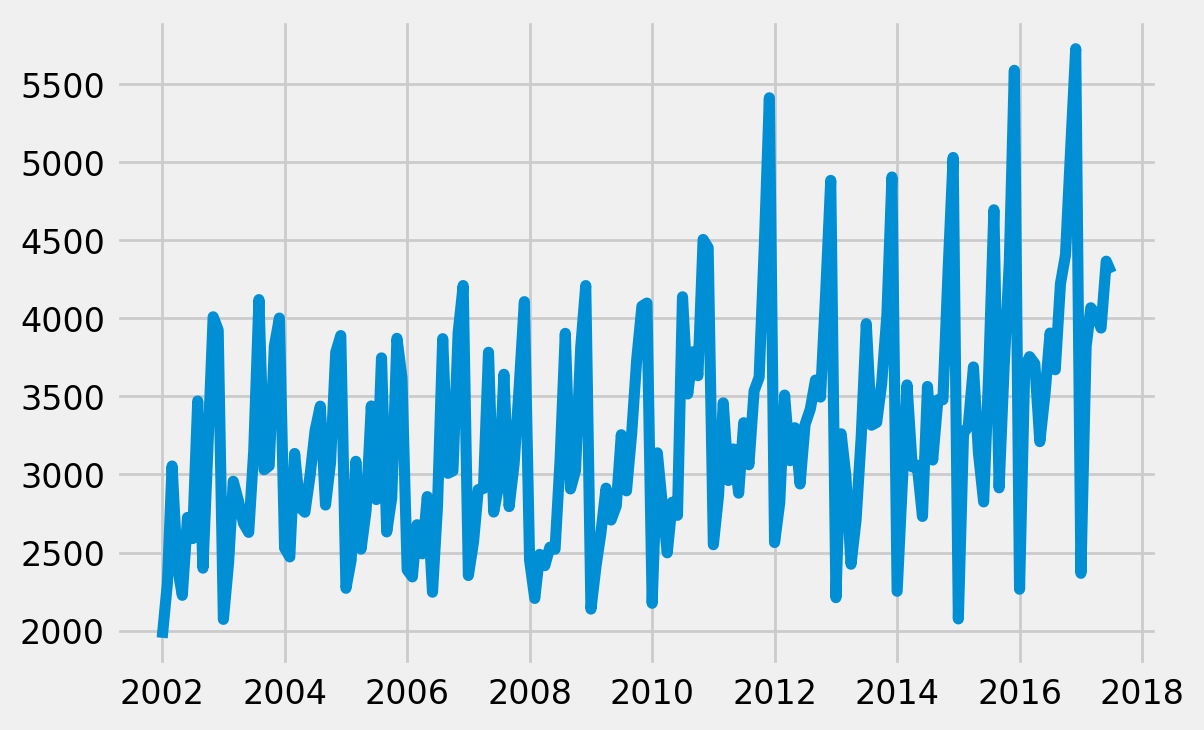

In [8]:
plt.plot(tsa)

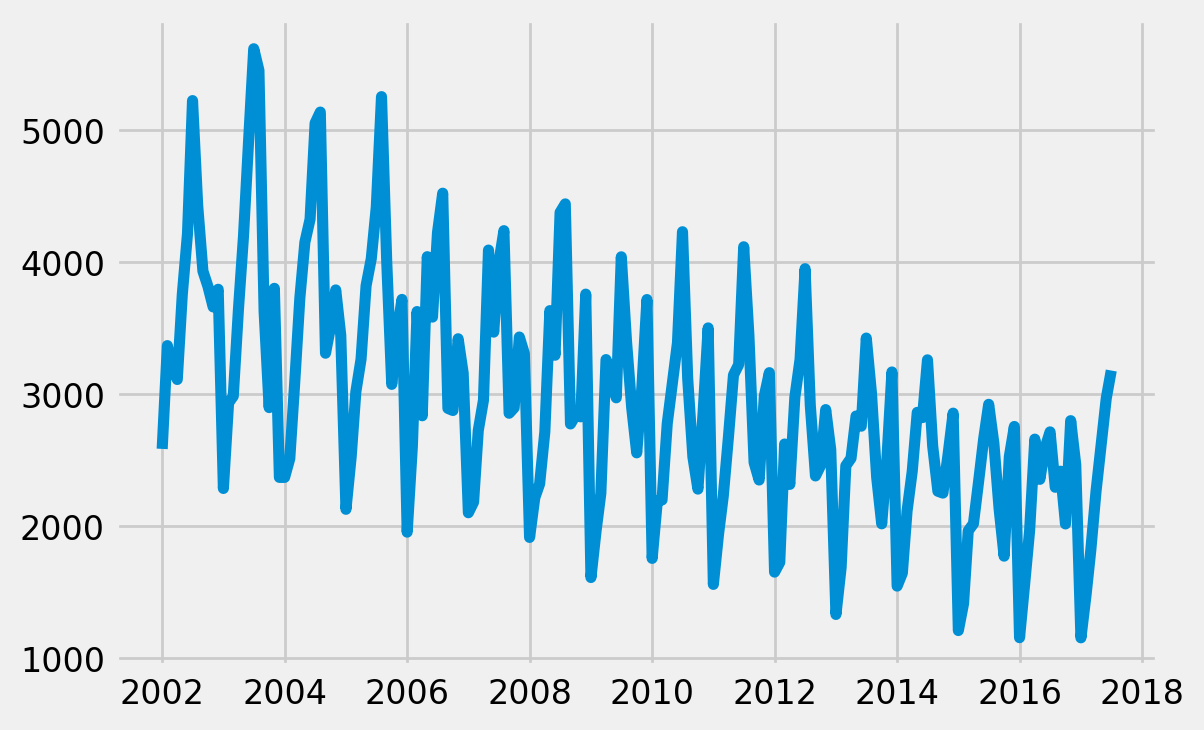

In [9]:
plt.plot(tsb)

## Observations
- Item A has upward moving trend.
- Item B has downward moving trend.
- Item A has shown increase in lower and upper point.
- Whereas Item B has decrease in lower and upper point.
- Their are not abrupt change in both series.
- Their are no Outliers in both series.
- Also Long run cycle is not present in both series.

**********
## 2. Before a formal extraction of time series components is done, can you check for seasonal changes in the data for the two series separately? Particularly whether there are more variability in a season compared to the others, whether seasonal variations are changing across years etc. Compare the behavior of the two series.

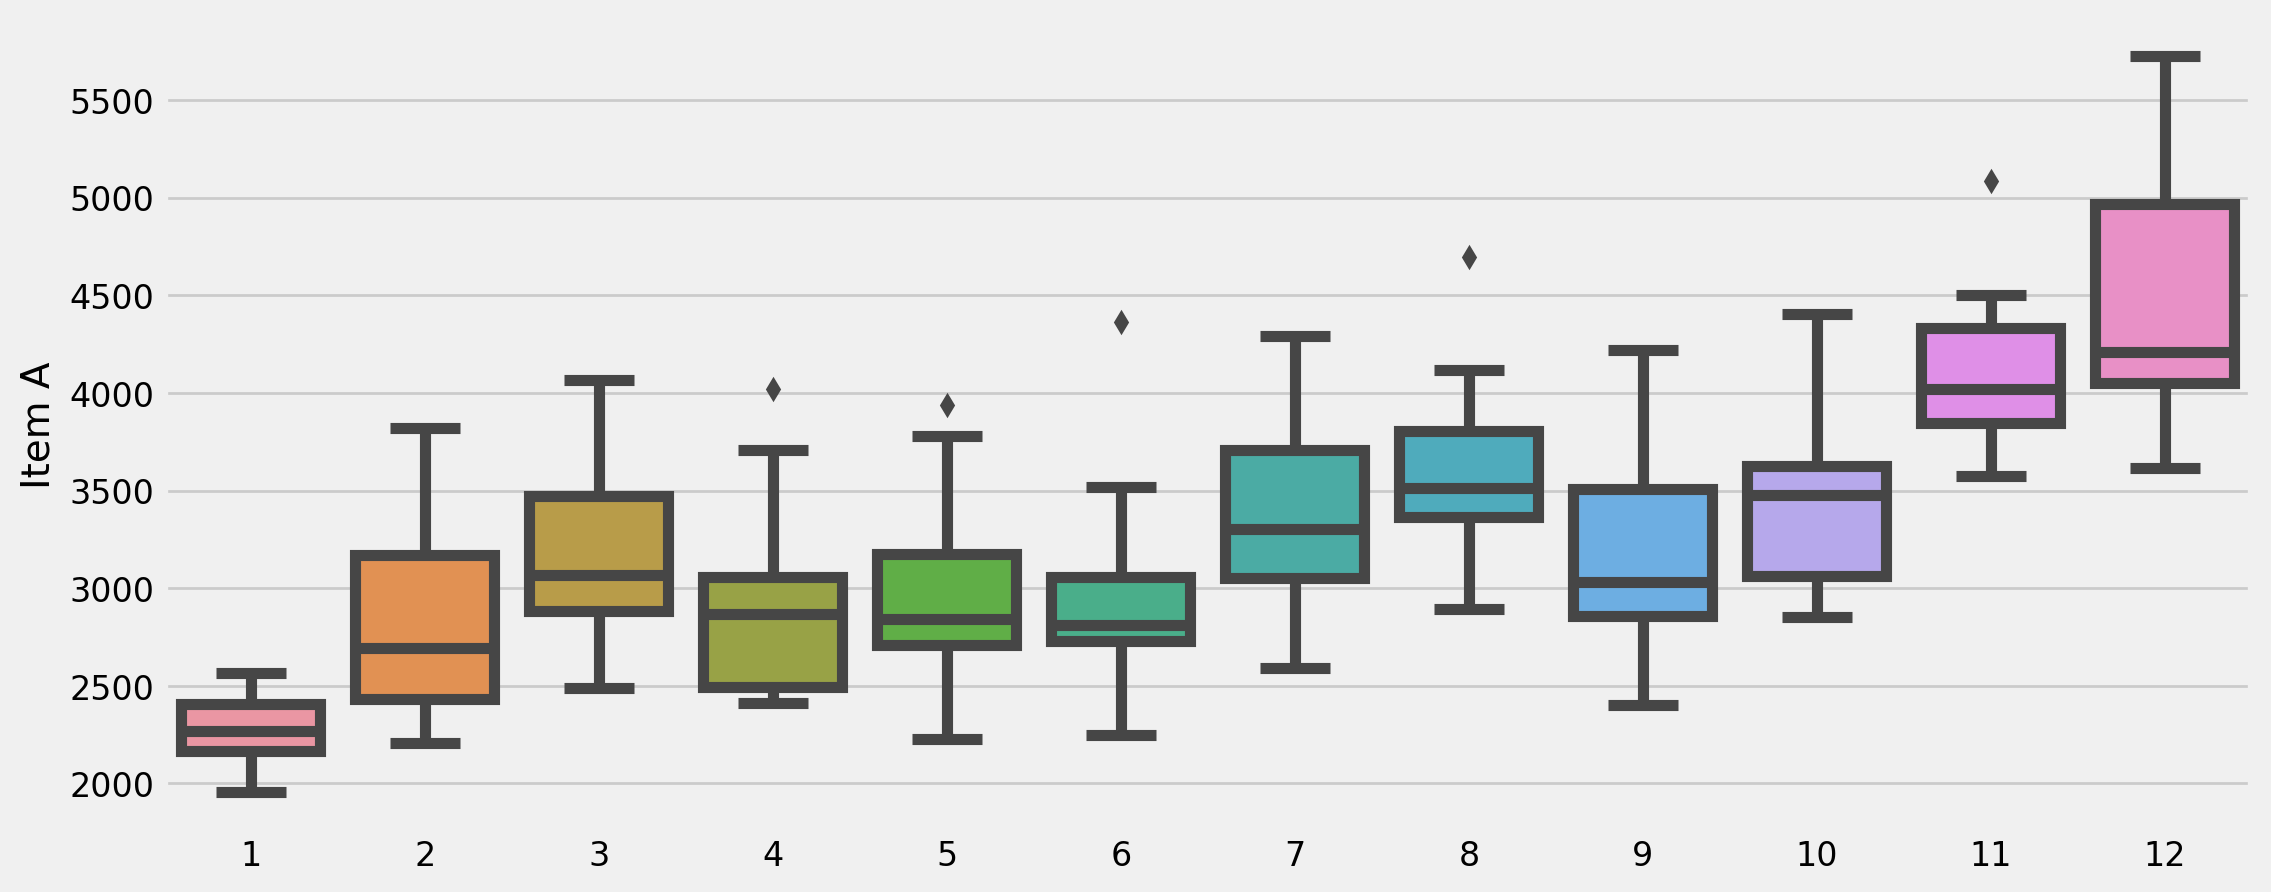

In [10]:
import seaborn
fig, ax = plt.subplots(figsize=(12,5))
seaborn.boxplot(tsa.index.month, tsa, ax=ax)

#get box plot here

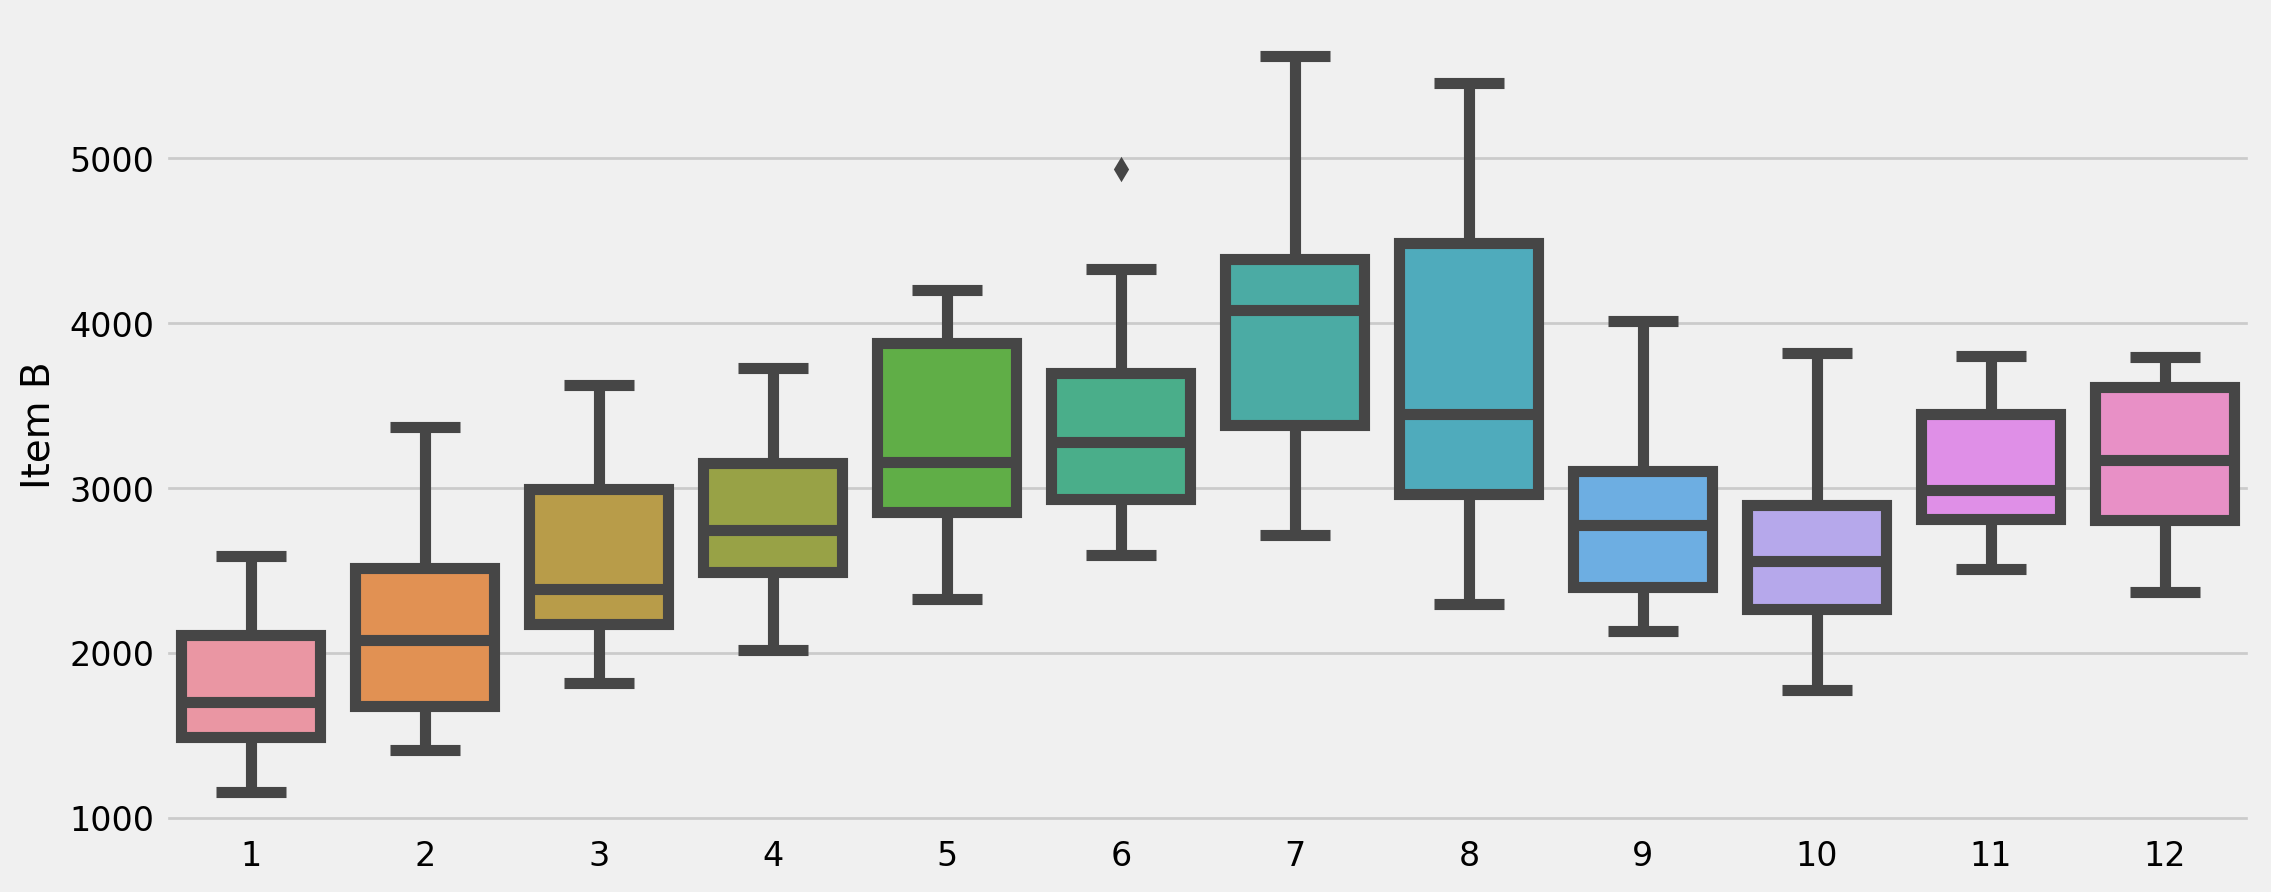

In [11]:
fig, ax = plt.subplots(figsize=(12,5))
seaborn.boxplot(tsb.index.month, tsb, ax=ax)

1. Item A has increasing Trend whereas Item B has decreasing trend.
- Seasonality can be seen in both the Item.
- Item A start season above 2000 and move upward till end of the year above 4000
- Whereas Item B start little below 2000 and and end just above 3000.
- We can observe three peak in Item A durnig one season whereas two peak for Item B

***
## 3. Decompose each series to extract trend and seasonality, if there are any. Which seasonality is more appropriate – additive or multiplicative? Explain the seasonal indices. In which month(s) do you see higher sales and which month(s) you see lower sales? Any difference in the nature of demand of the two items?

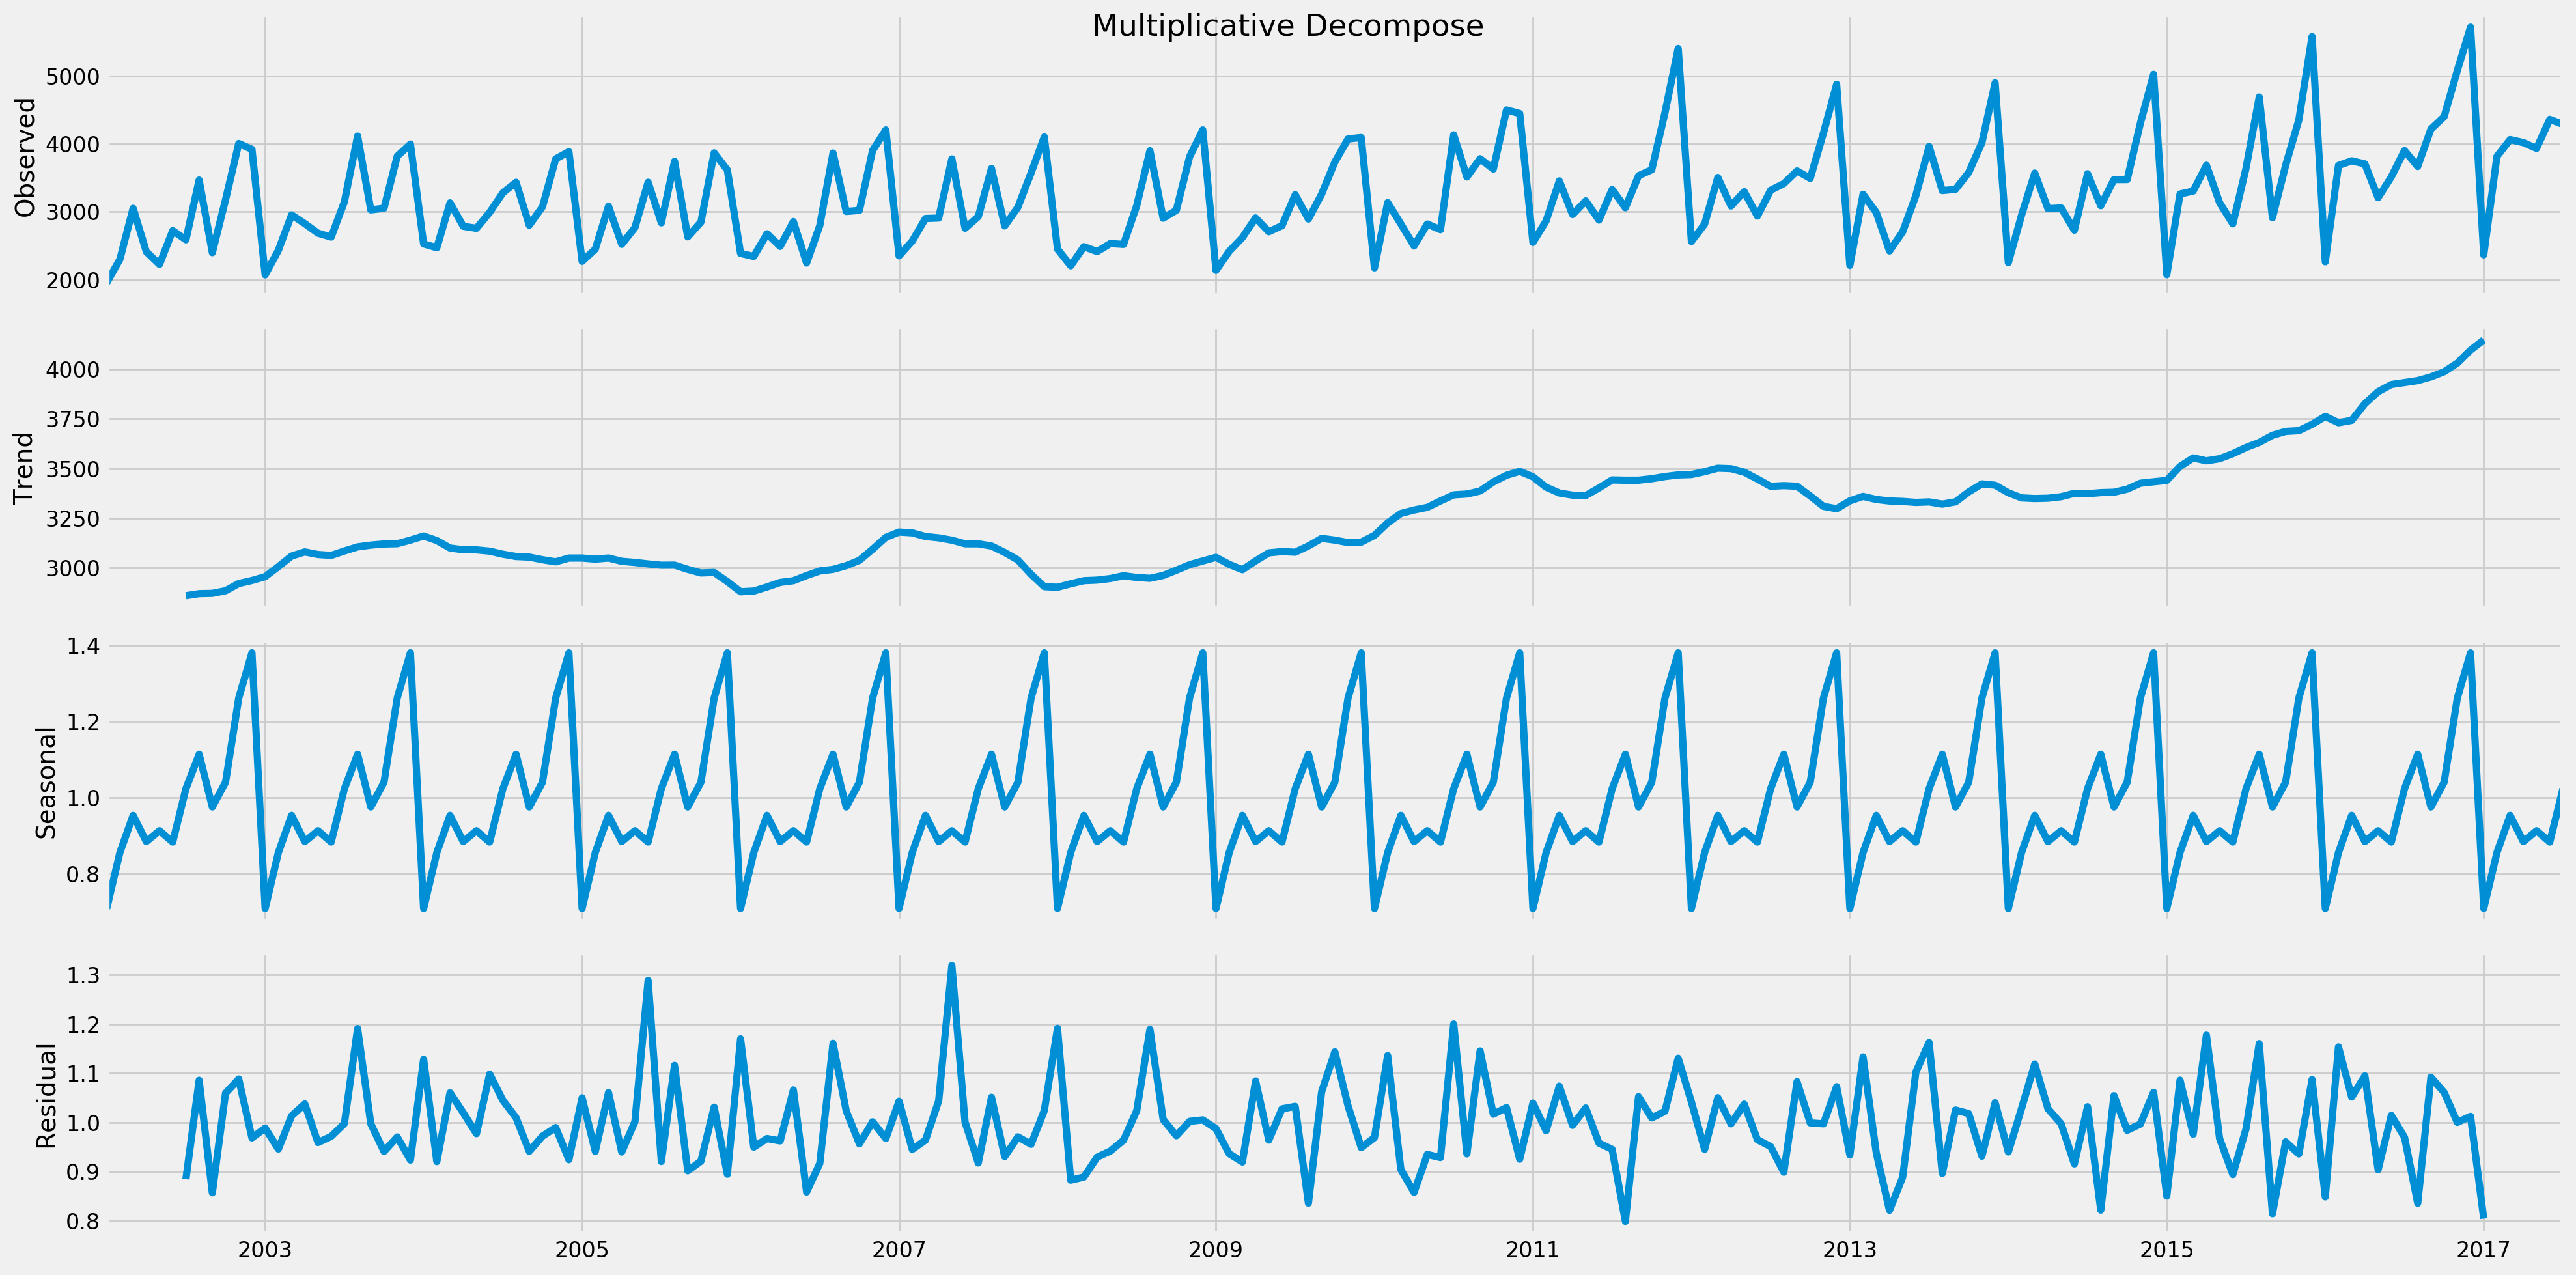

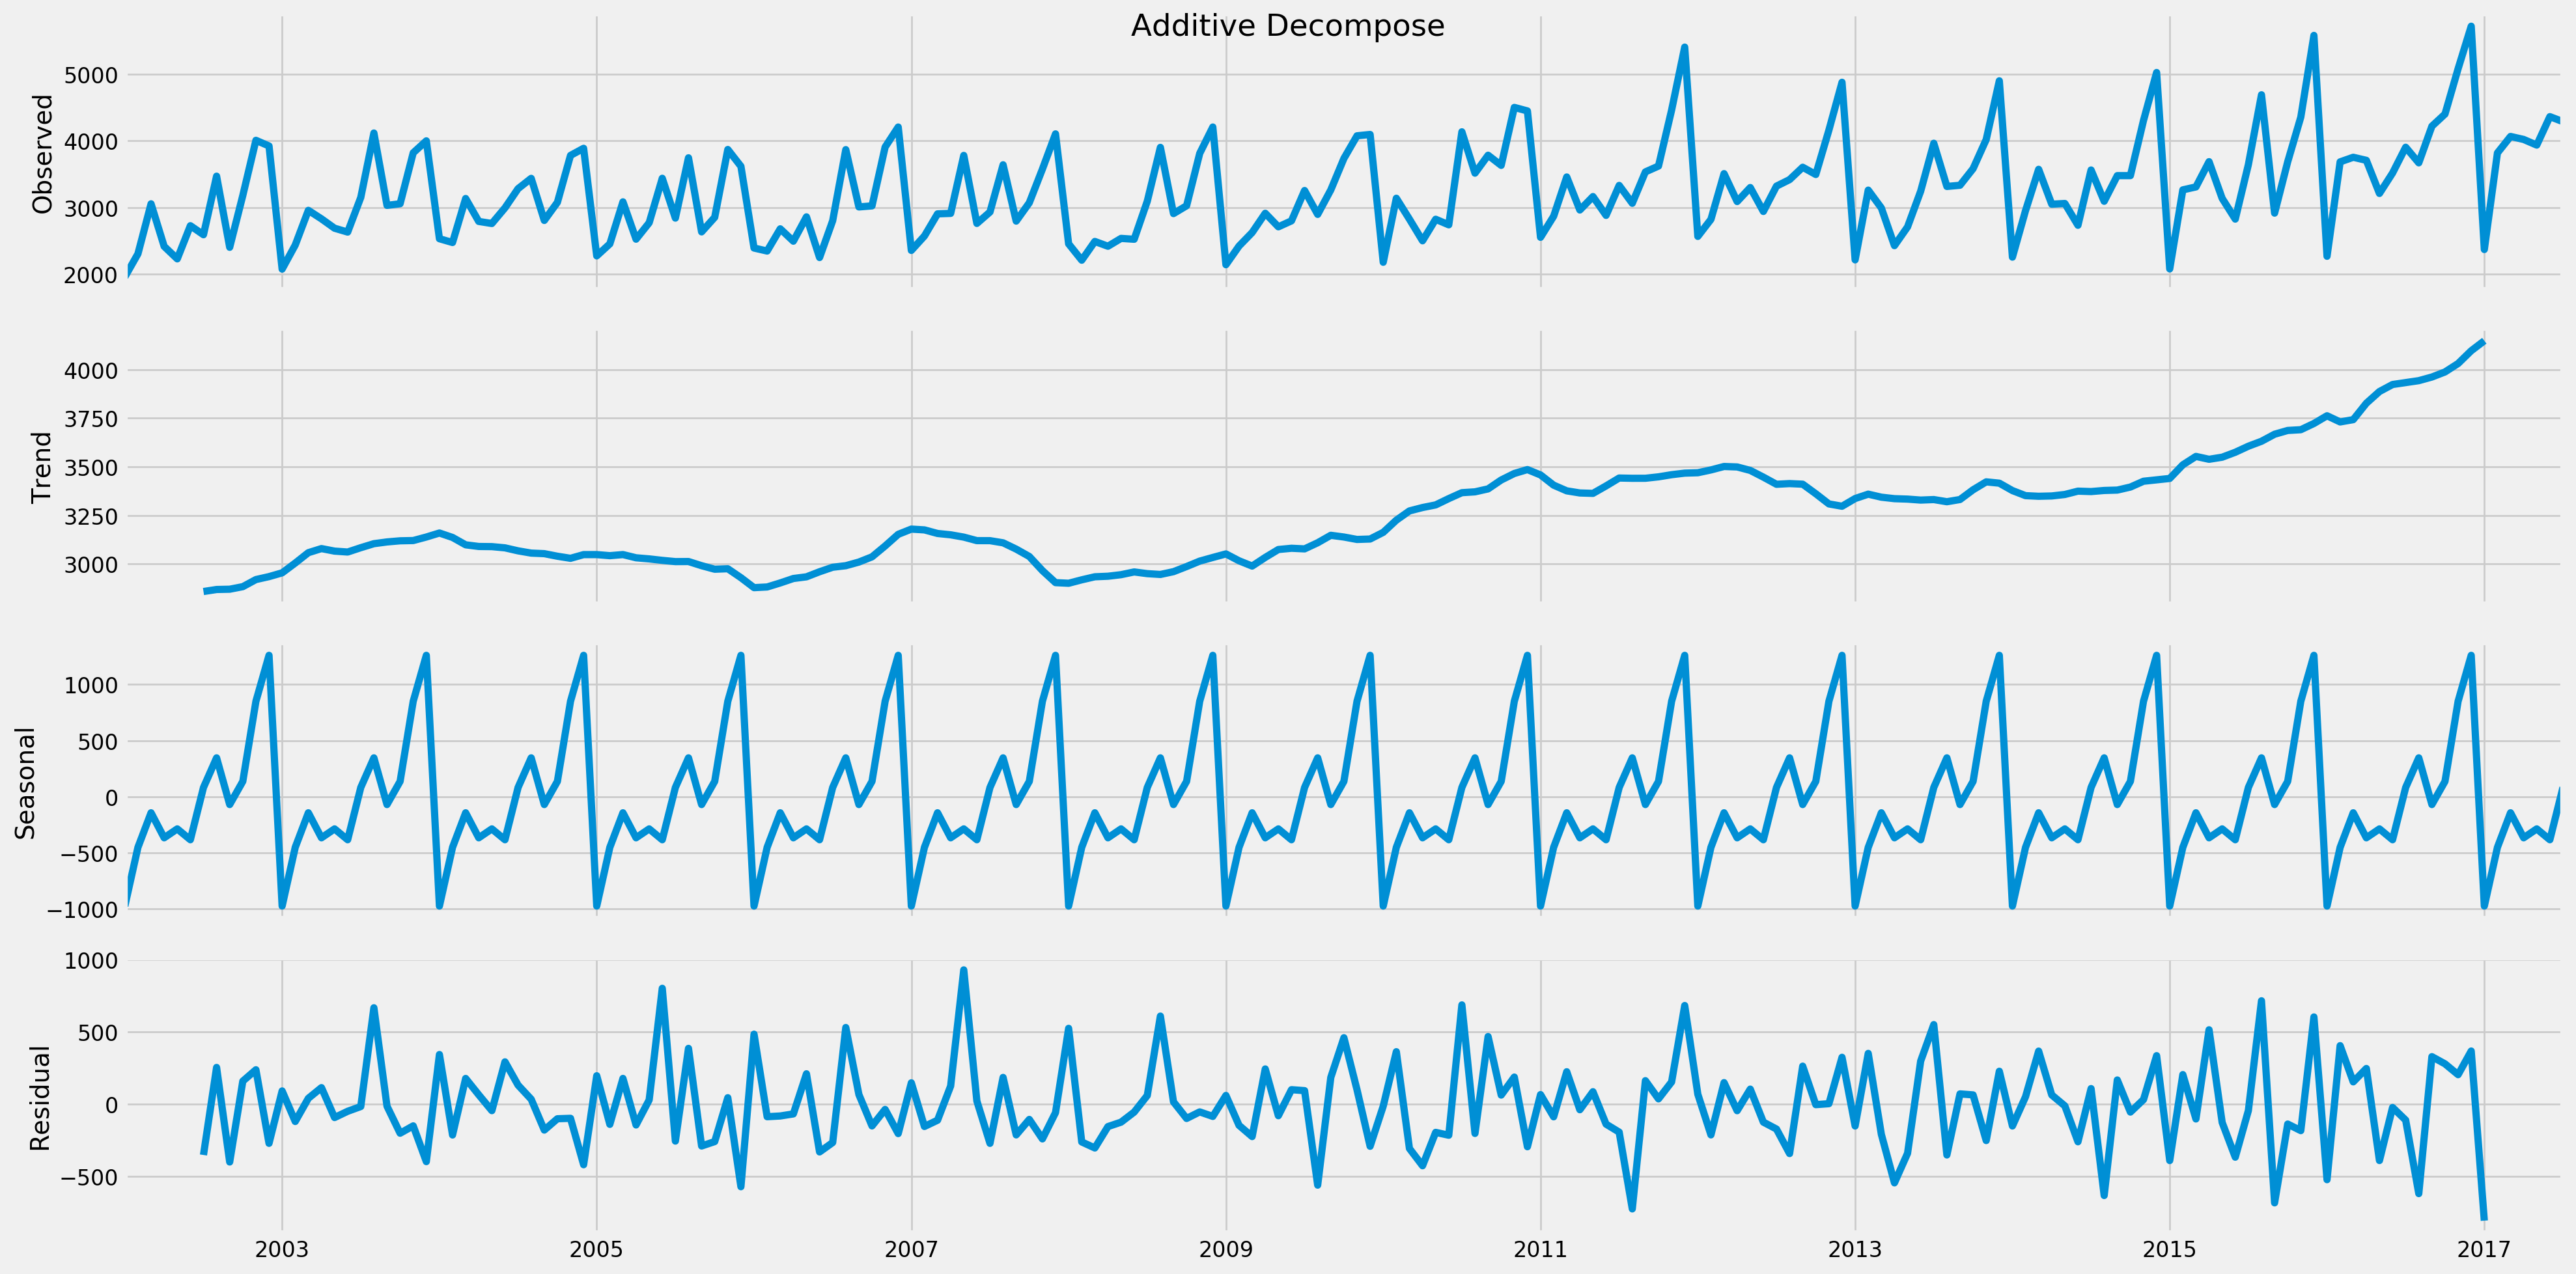

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
result_mul = seasonal_decompose(tsa, model='multiplicative')

# Additive Decomposition
result_add = seasonal_decompose(tsa, model='additive')

# Plot
plt.rcParams.update({'figure.figsize': (20,10)})
result_mul.plot().suptitle('Multiplicative Decompose')
result_add.plot().suptitle('Additive Decompose')
plt.show()

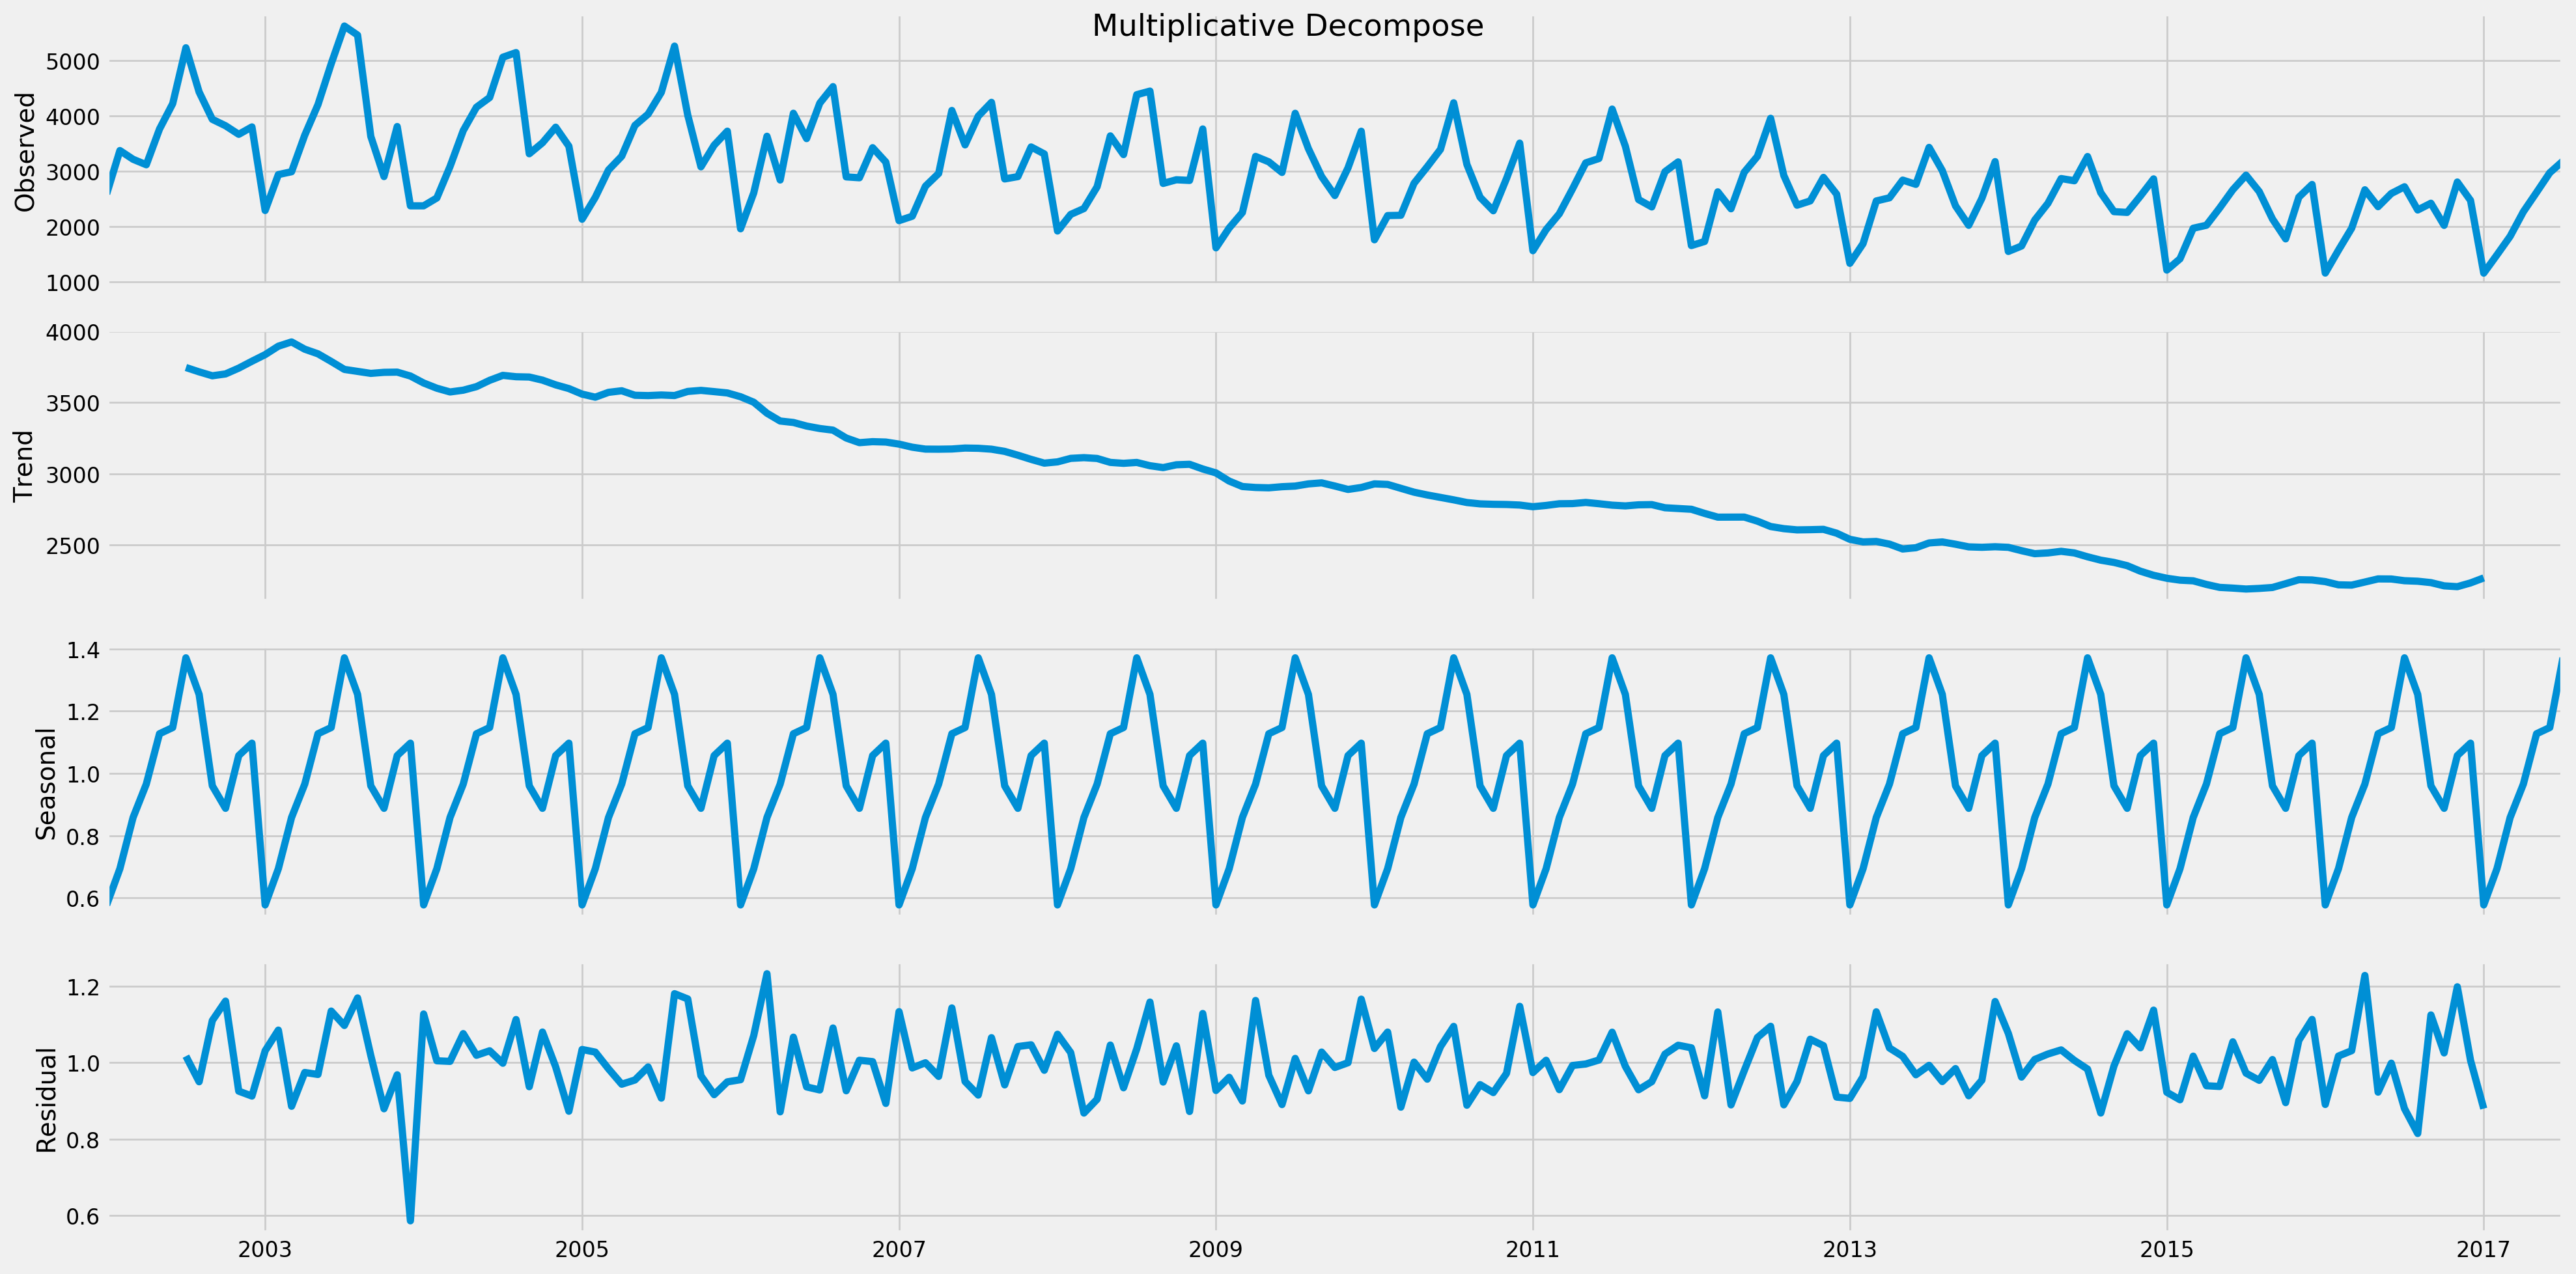

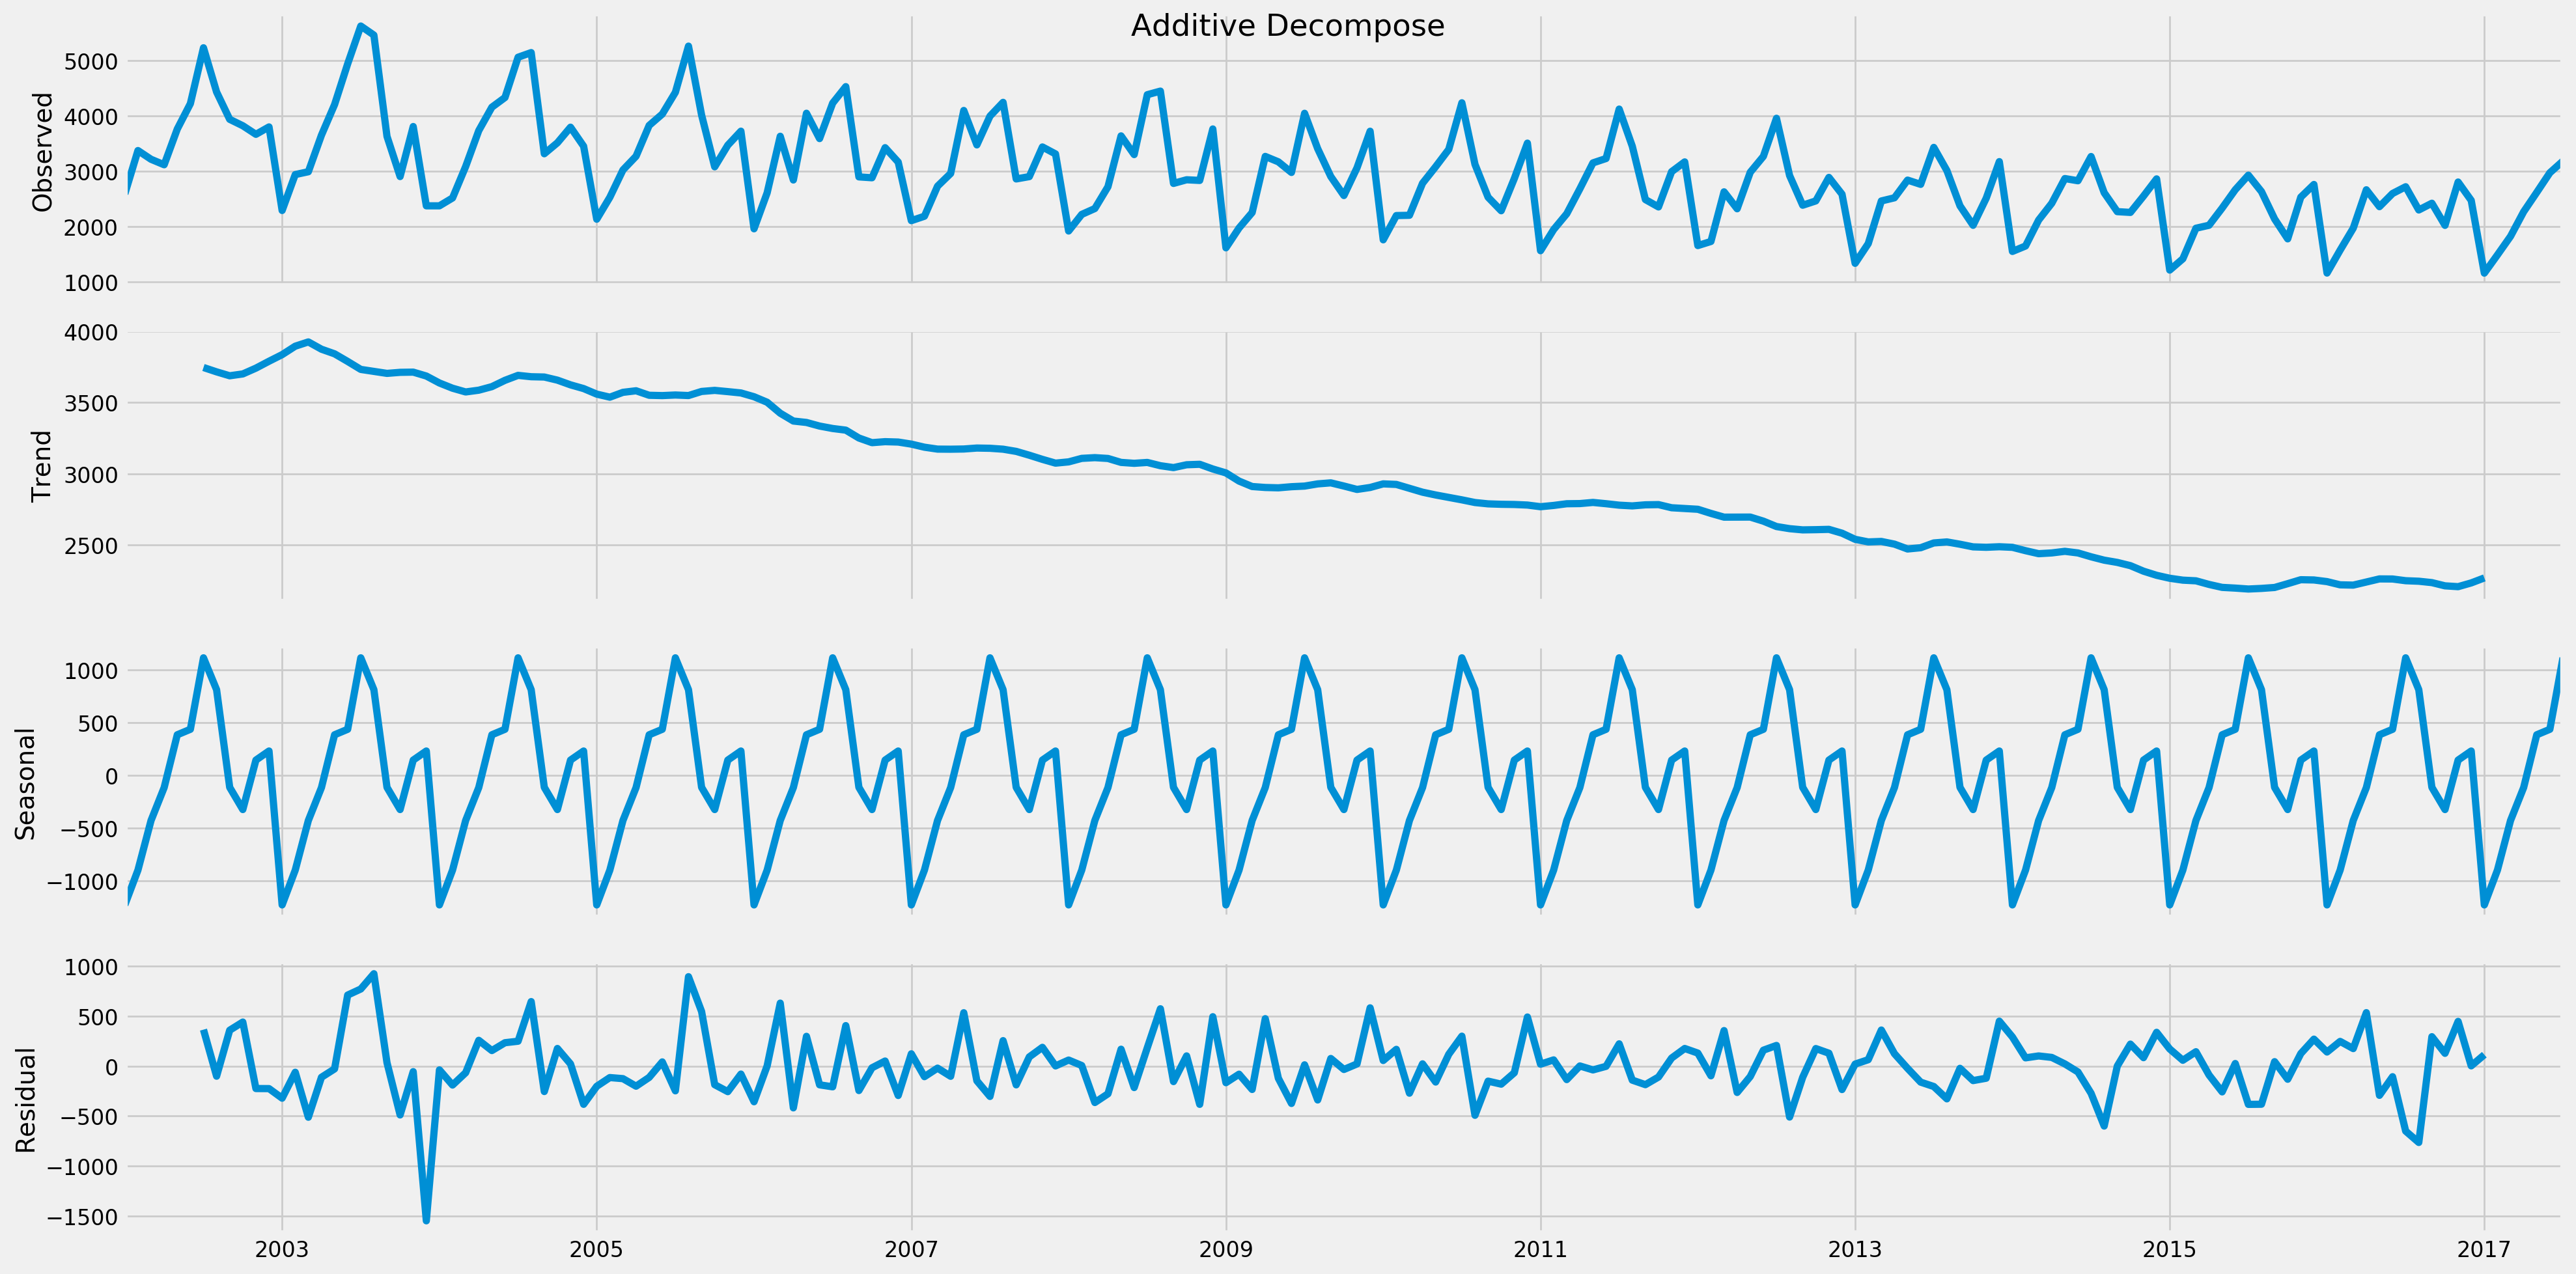

In [13]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(tsb, model='multiplicative')

# Additive Decomposition
result_add = seasonal_decompose(tsb, model='additive')

# Plot
plt.rcParams.update({'figure.figsize': (20,10)})
result_mul.plot().suptitle('Multiplicative Decompose')
result_add.plot().suptitle('Additive Decompose')
plt.show()

1. Multiplicative seasonality is more appropriate .
- For Item A December has high sale and lowest in January
- For Item B July has highest sale and lowest is recored in January.
- Item A has increasing Trend whereas Item B has decreasing trend.
- We can observe three peak in Item A durnig one season whereas two peak for Item B


***
## 4. Can you extract the residuals for the two decomposition exercises and check if they form a stationary series? Do a formal test for stationarity writing down the null and alternative hypothesis. What is your conclusion in each case?

## Test Before extracting Residules.

In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='lightblue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
 

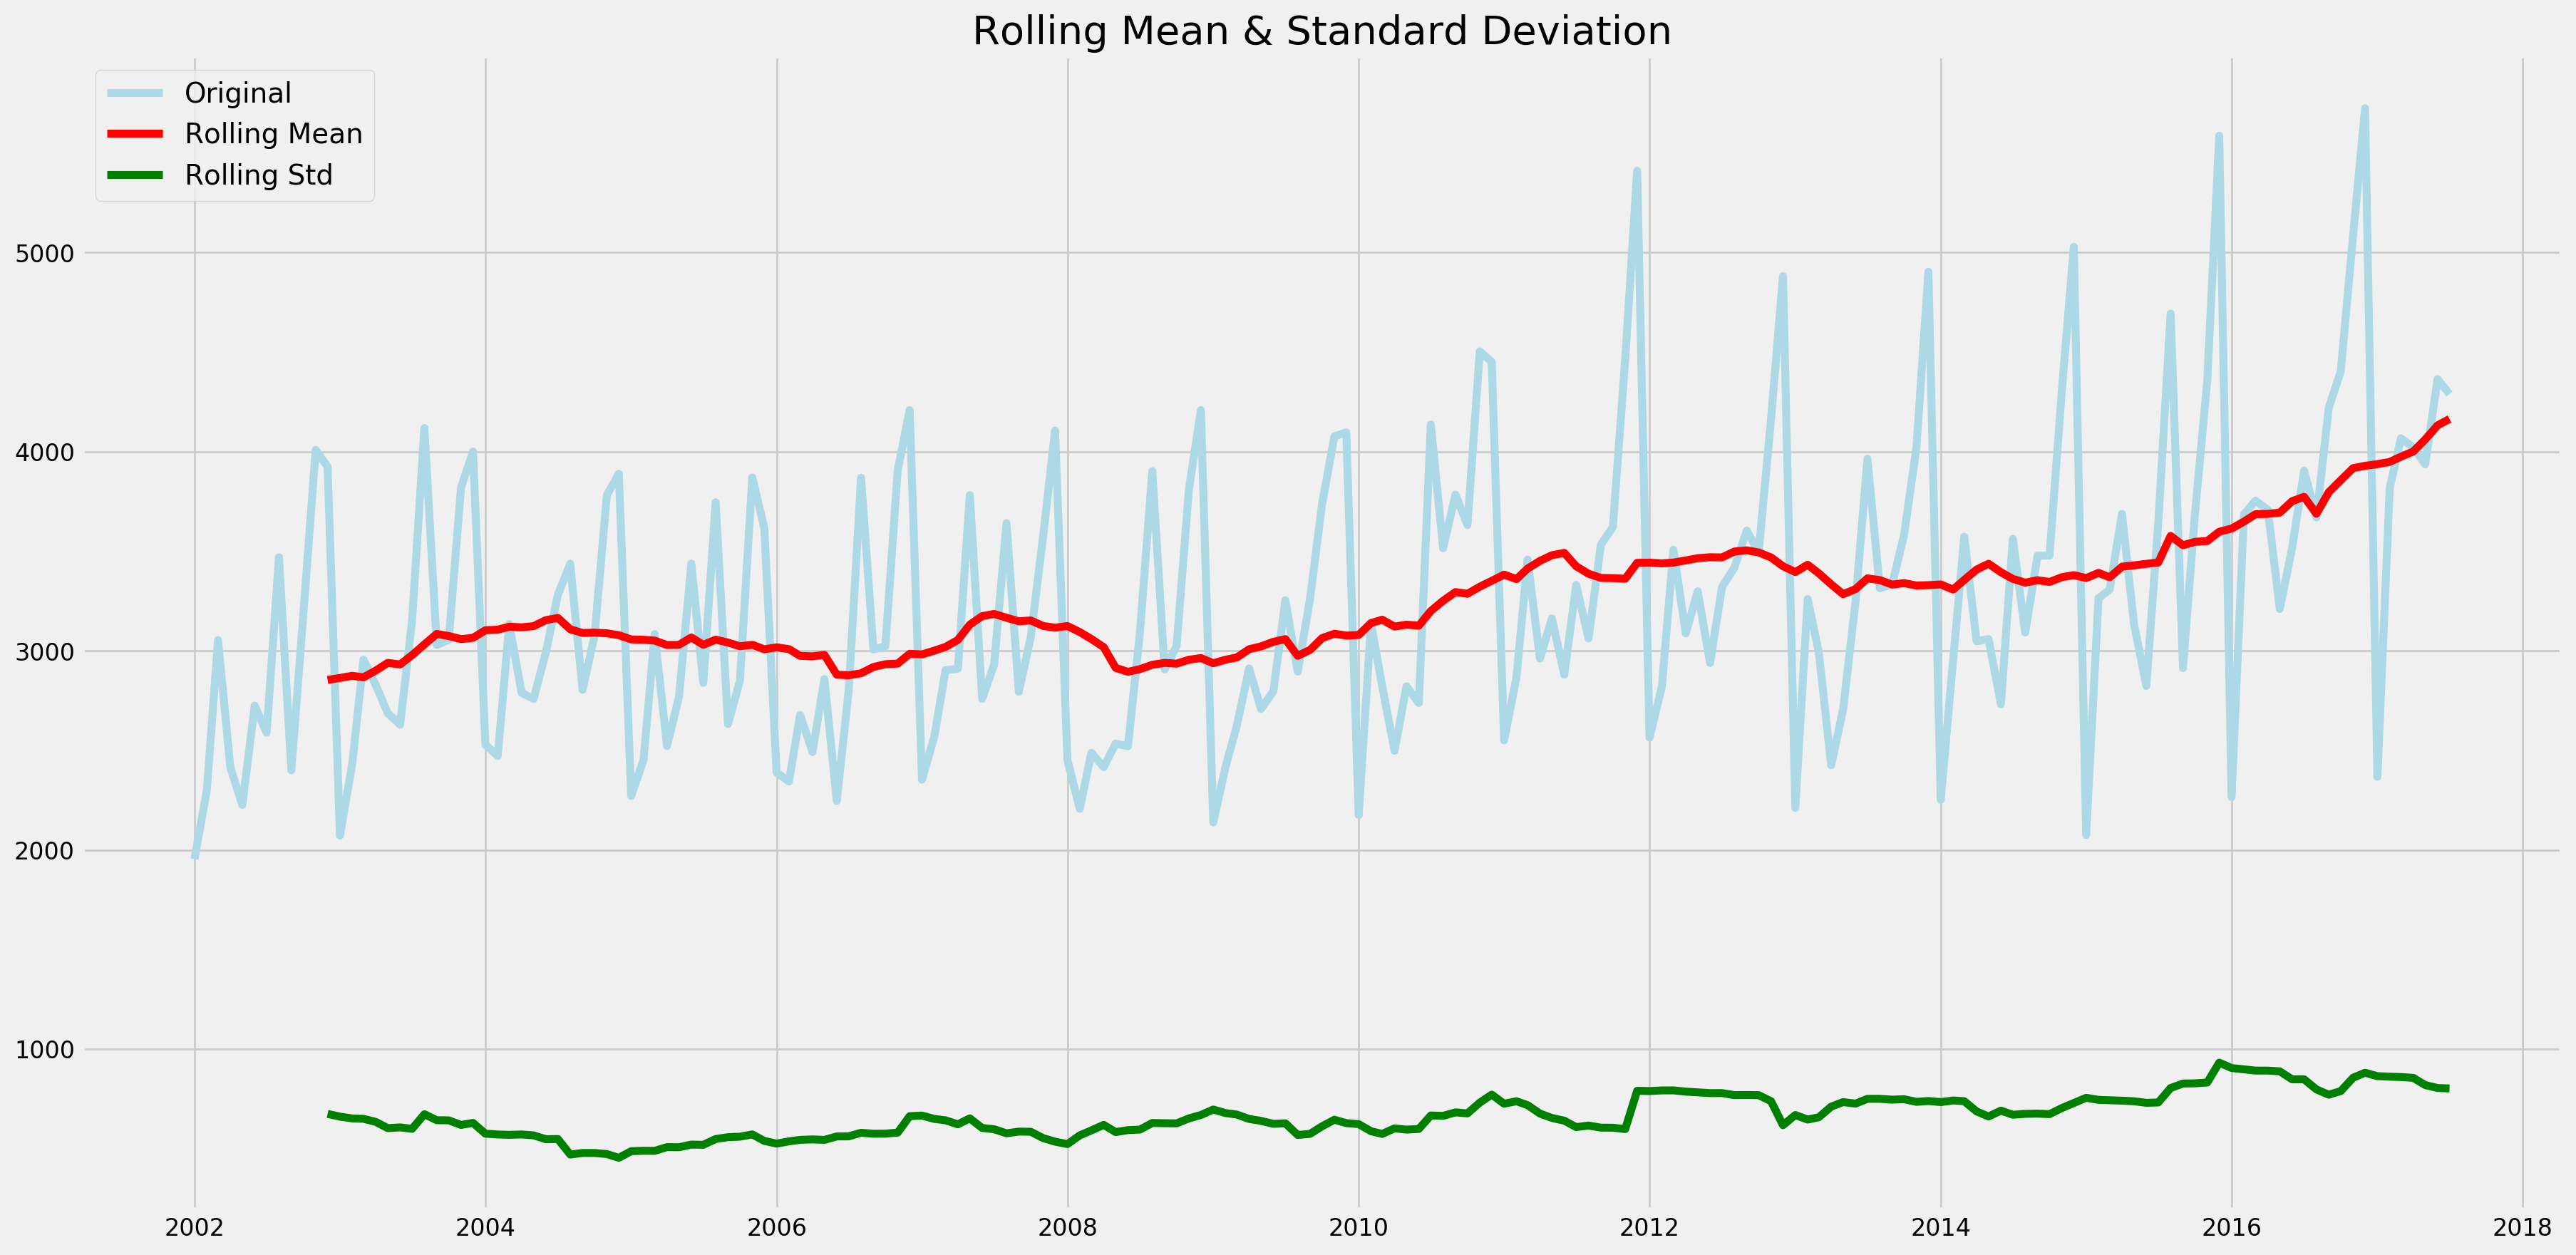

Results of Dickey-Fuller Test:
Test Statistic                   1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64


In [15]:
test_stationarity(tsa)

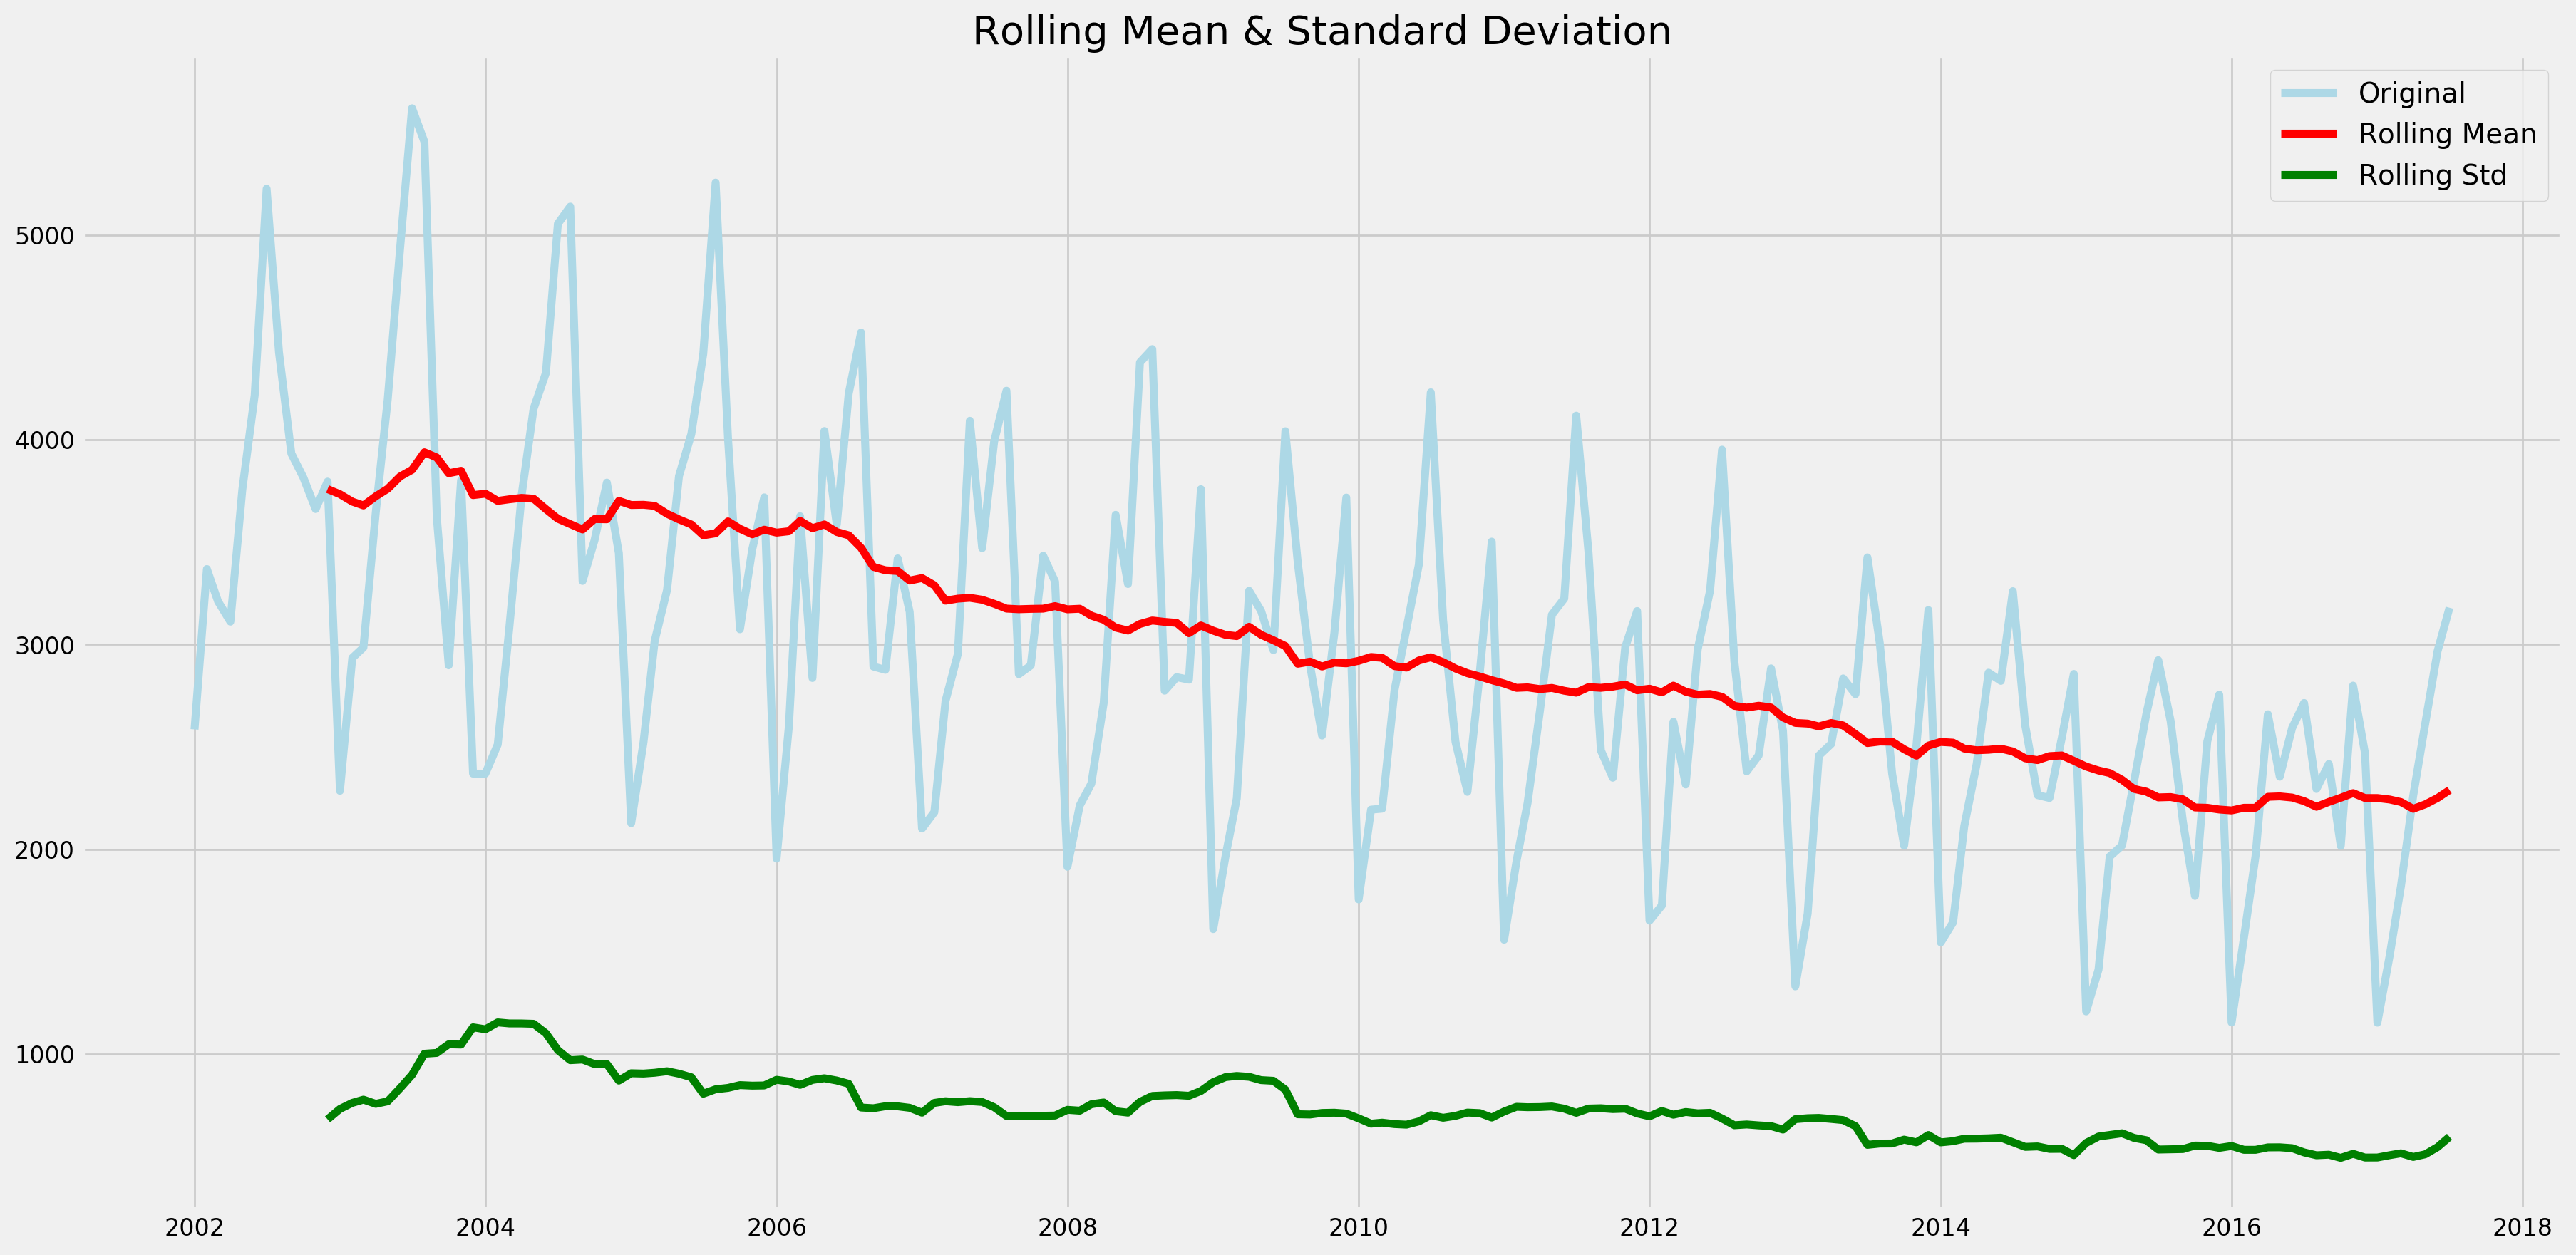

Results of Dickey-Fuller Test:
Test Statistic                  -0.907380
p-value                          0.785532
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64


In [16]:
test_stationarity(tsb)

### Hypothesis
##### H(0)= Time Series is non-stationary
##### H(a)= Time Series is stationary
As p-value above 5% for both the Series, We have to accept the null Hypothesis.
Which indicates Series is non-stationary.
<br>
## Now we will Test the Hypothesis by Extracting the Residuals

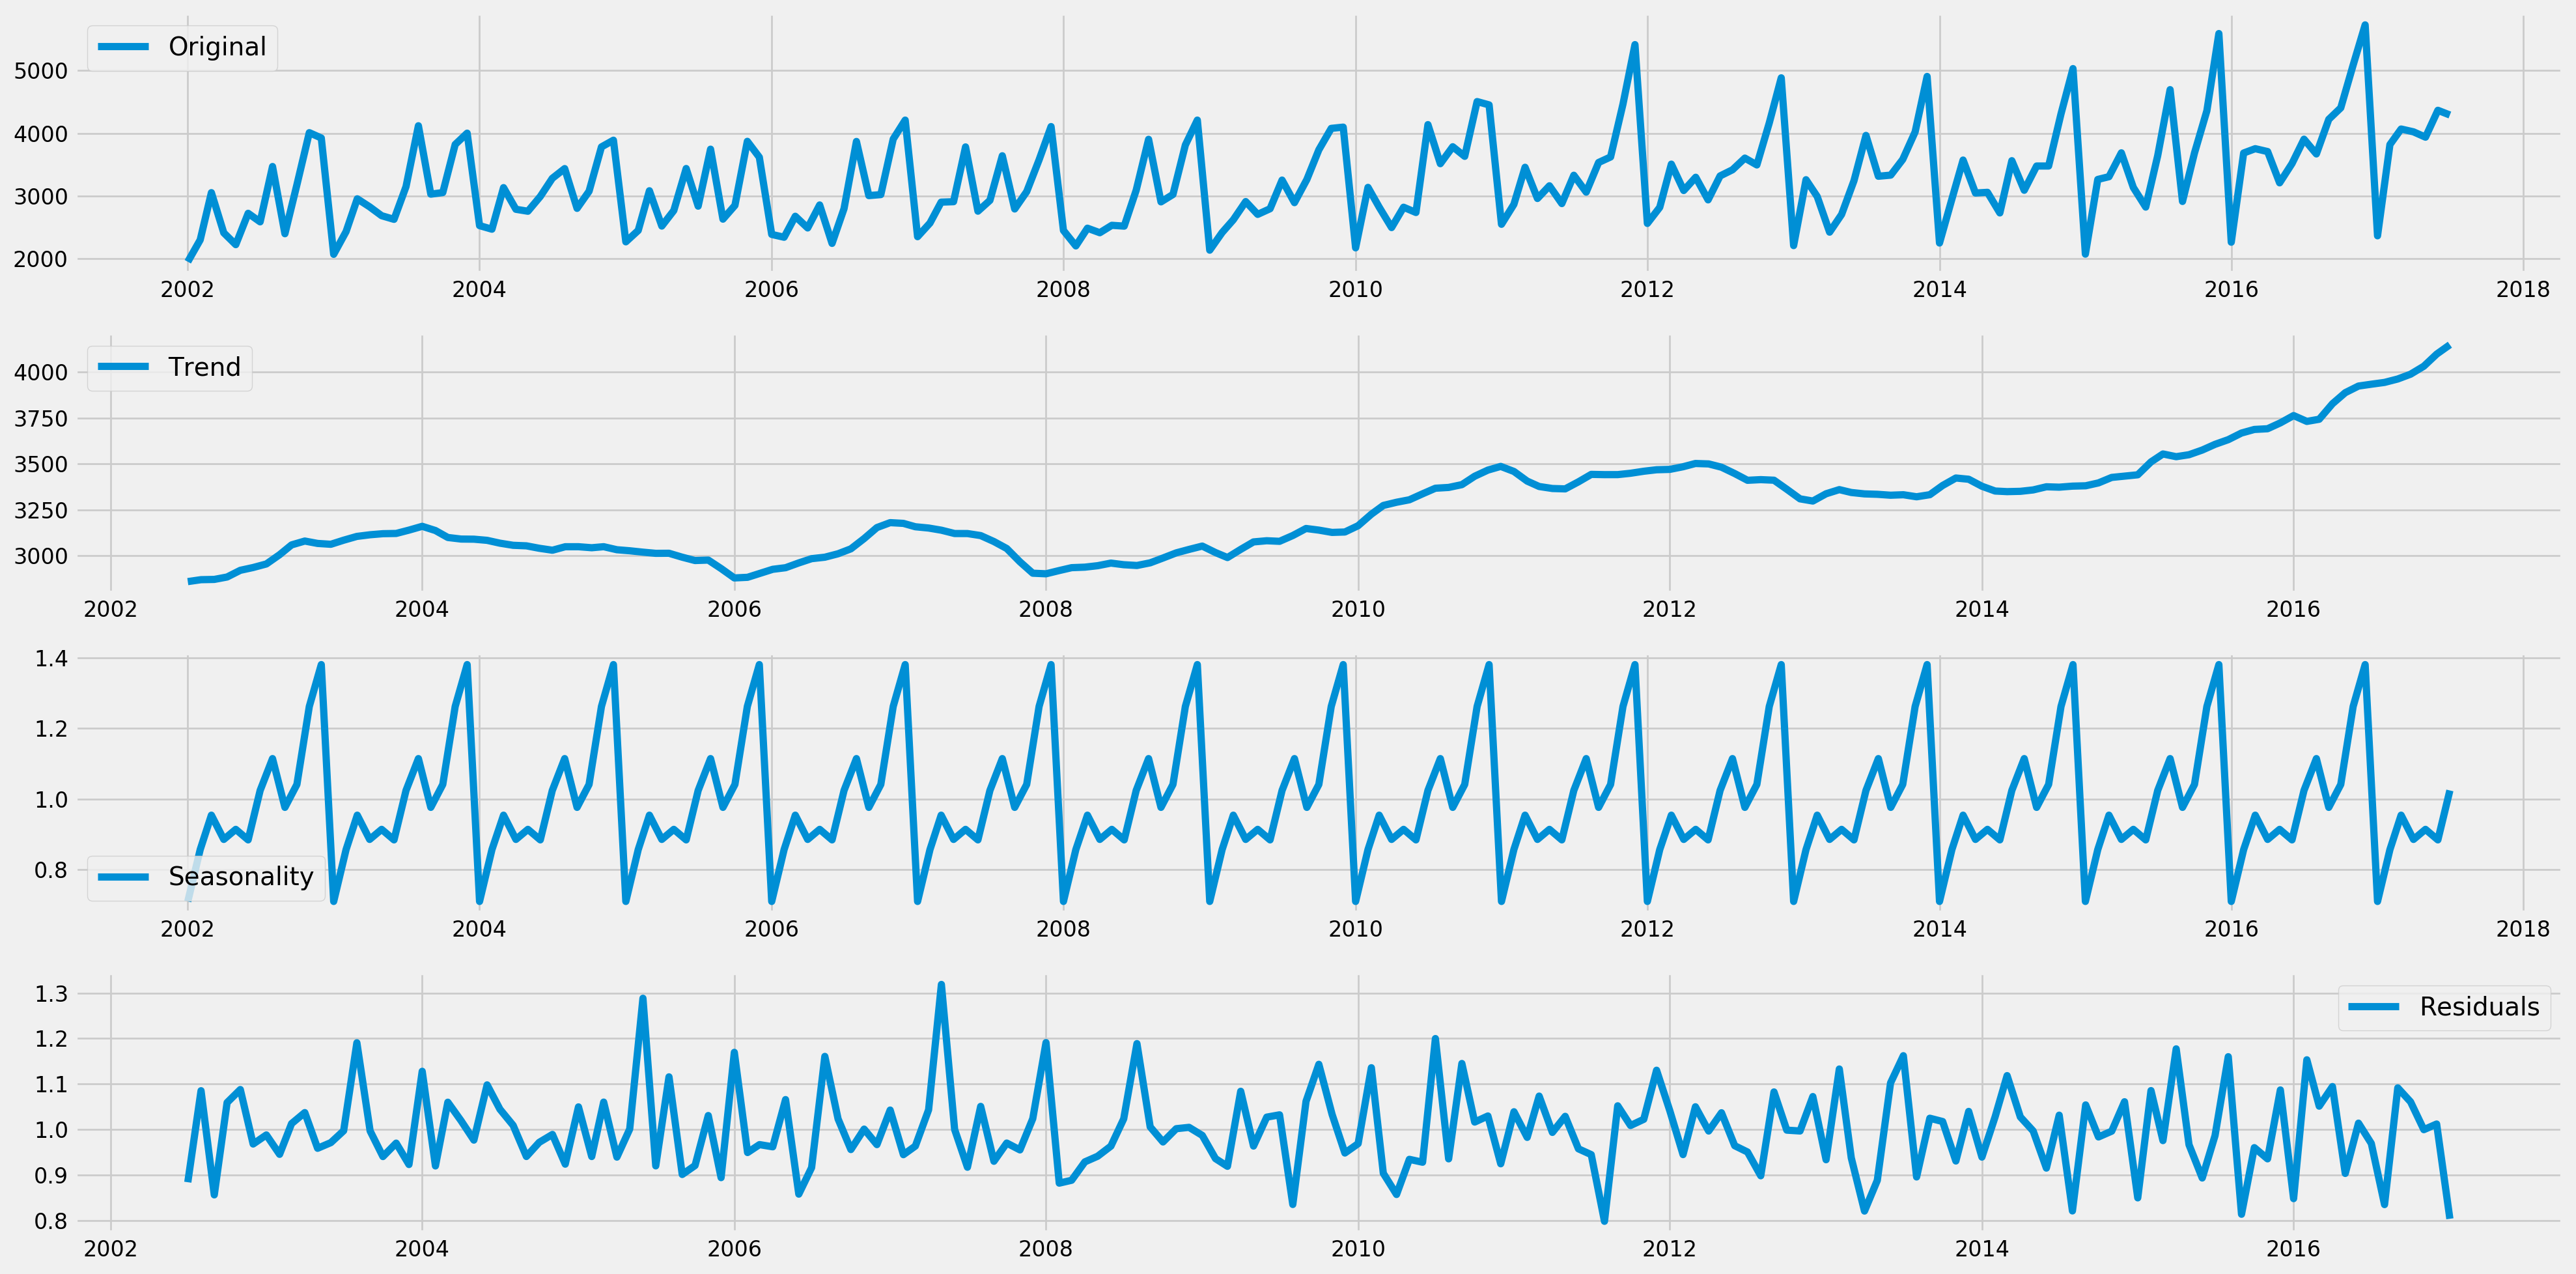

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tsa,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(tsa, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

tsar = residual


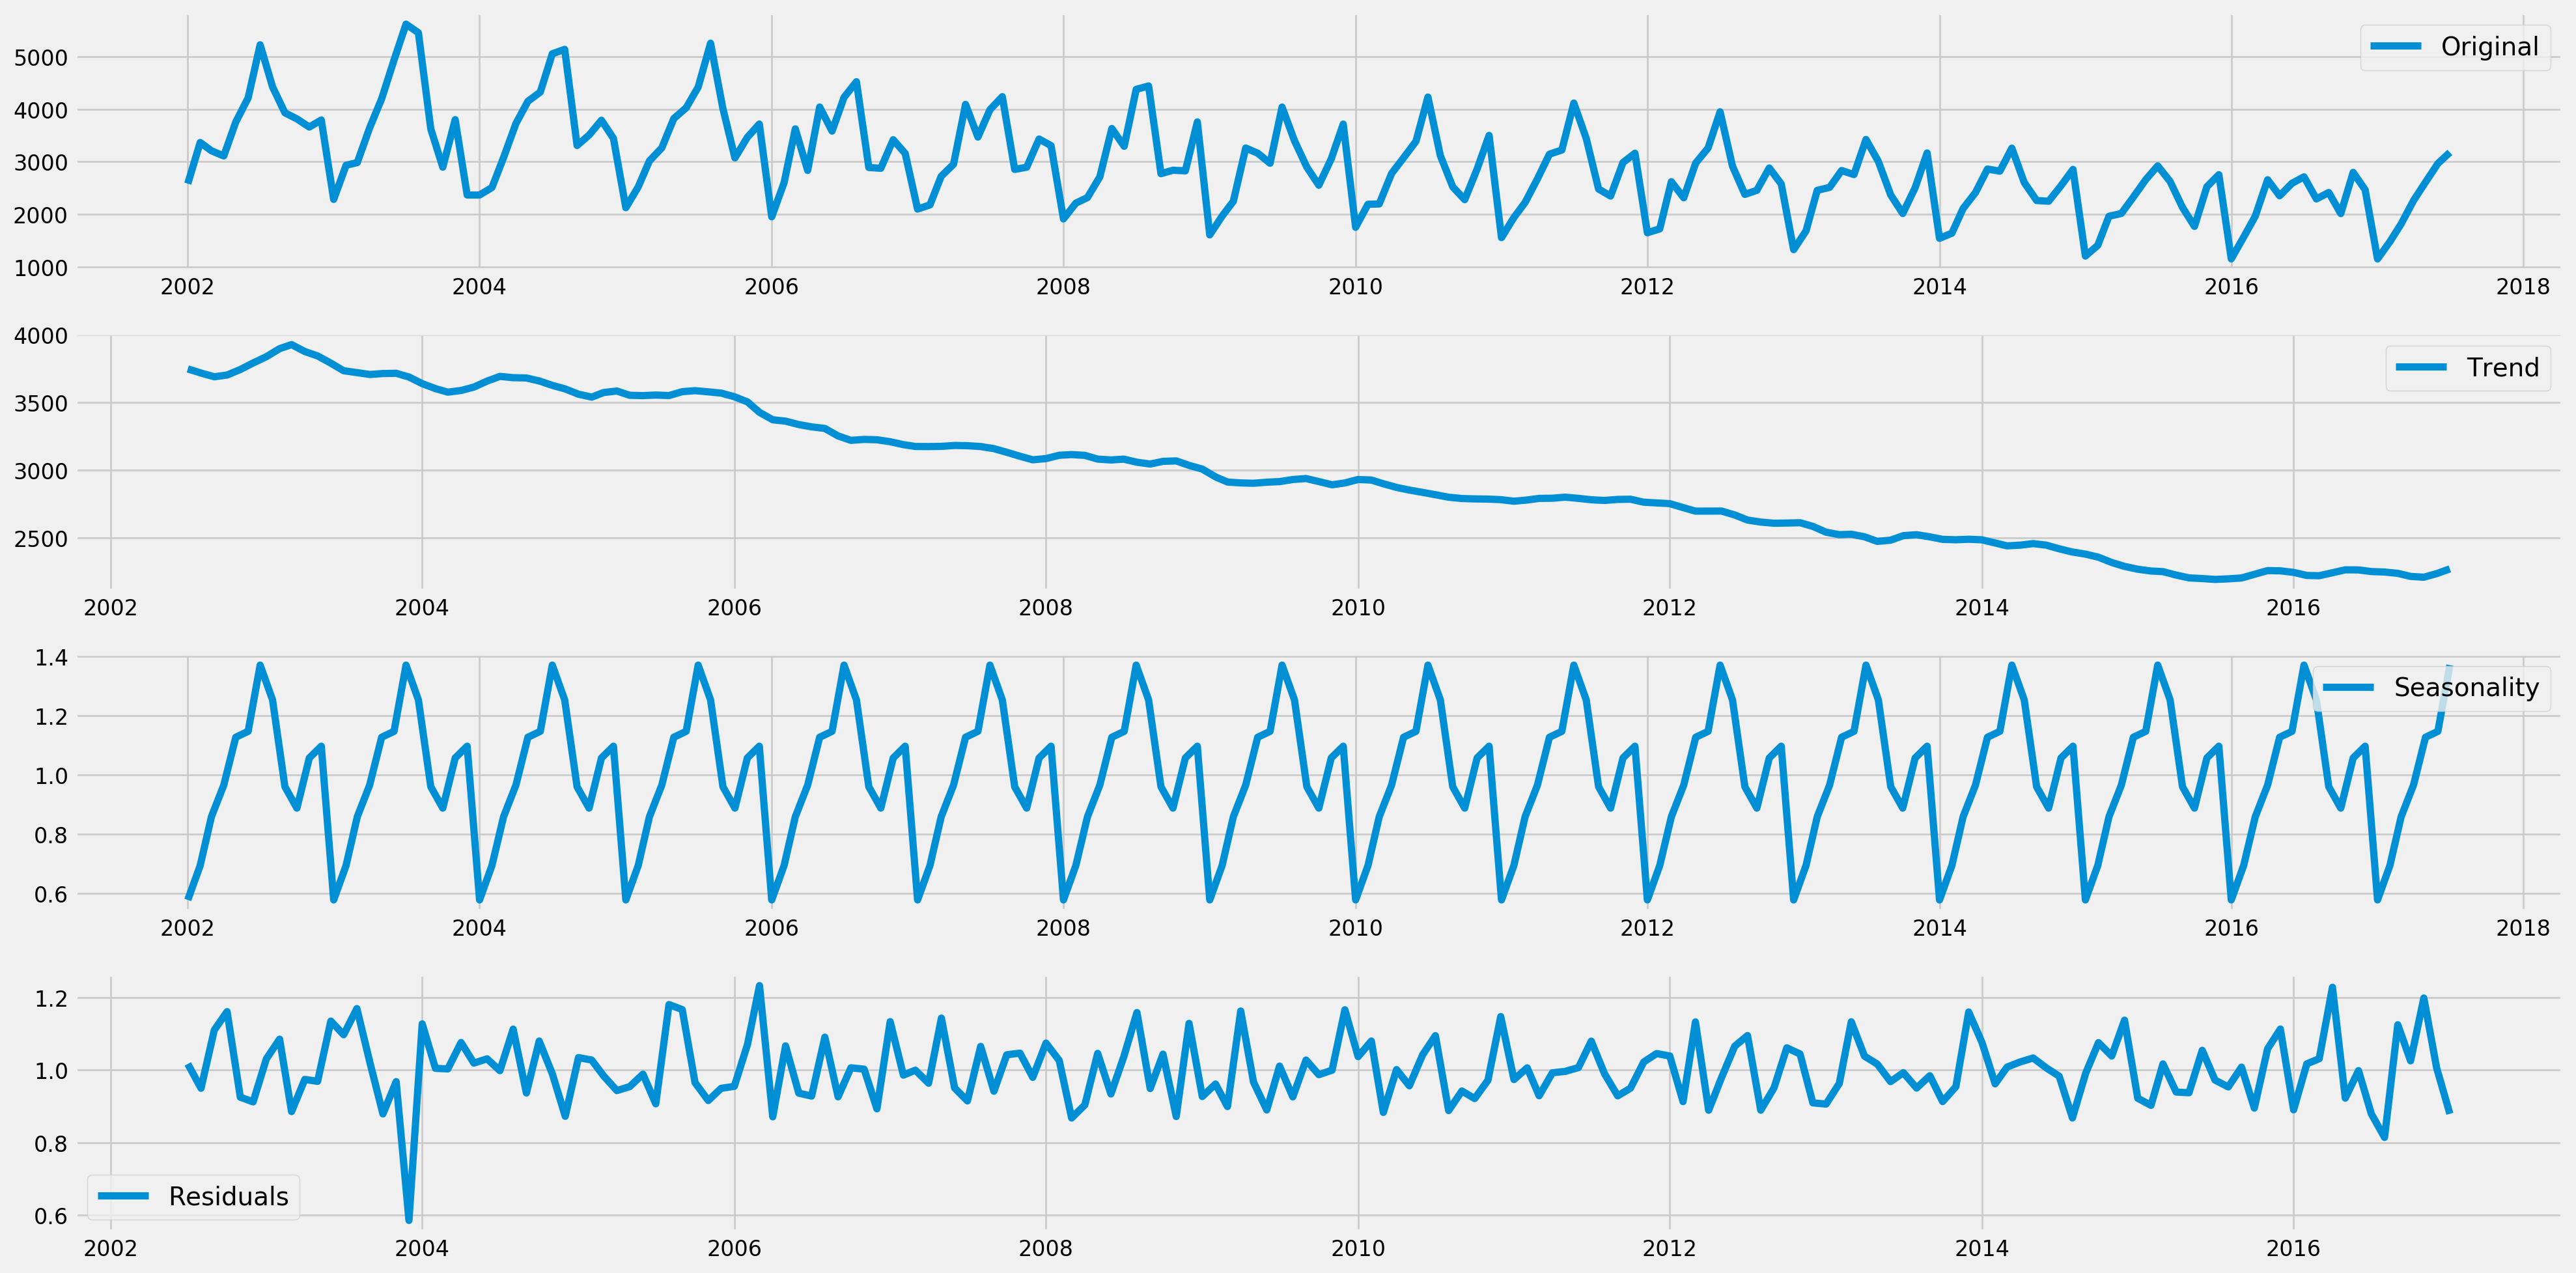

In [18]:
decomposition = seasonal_decompose(tsb,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(tsb, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

tsbr = residual


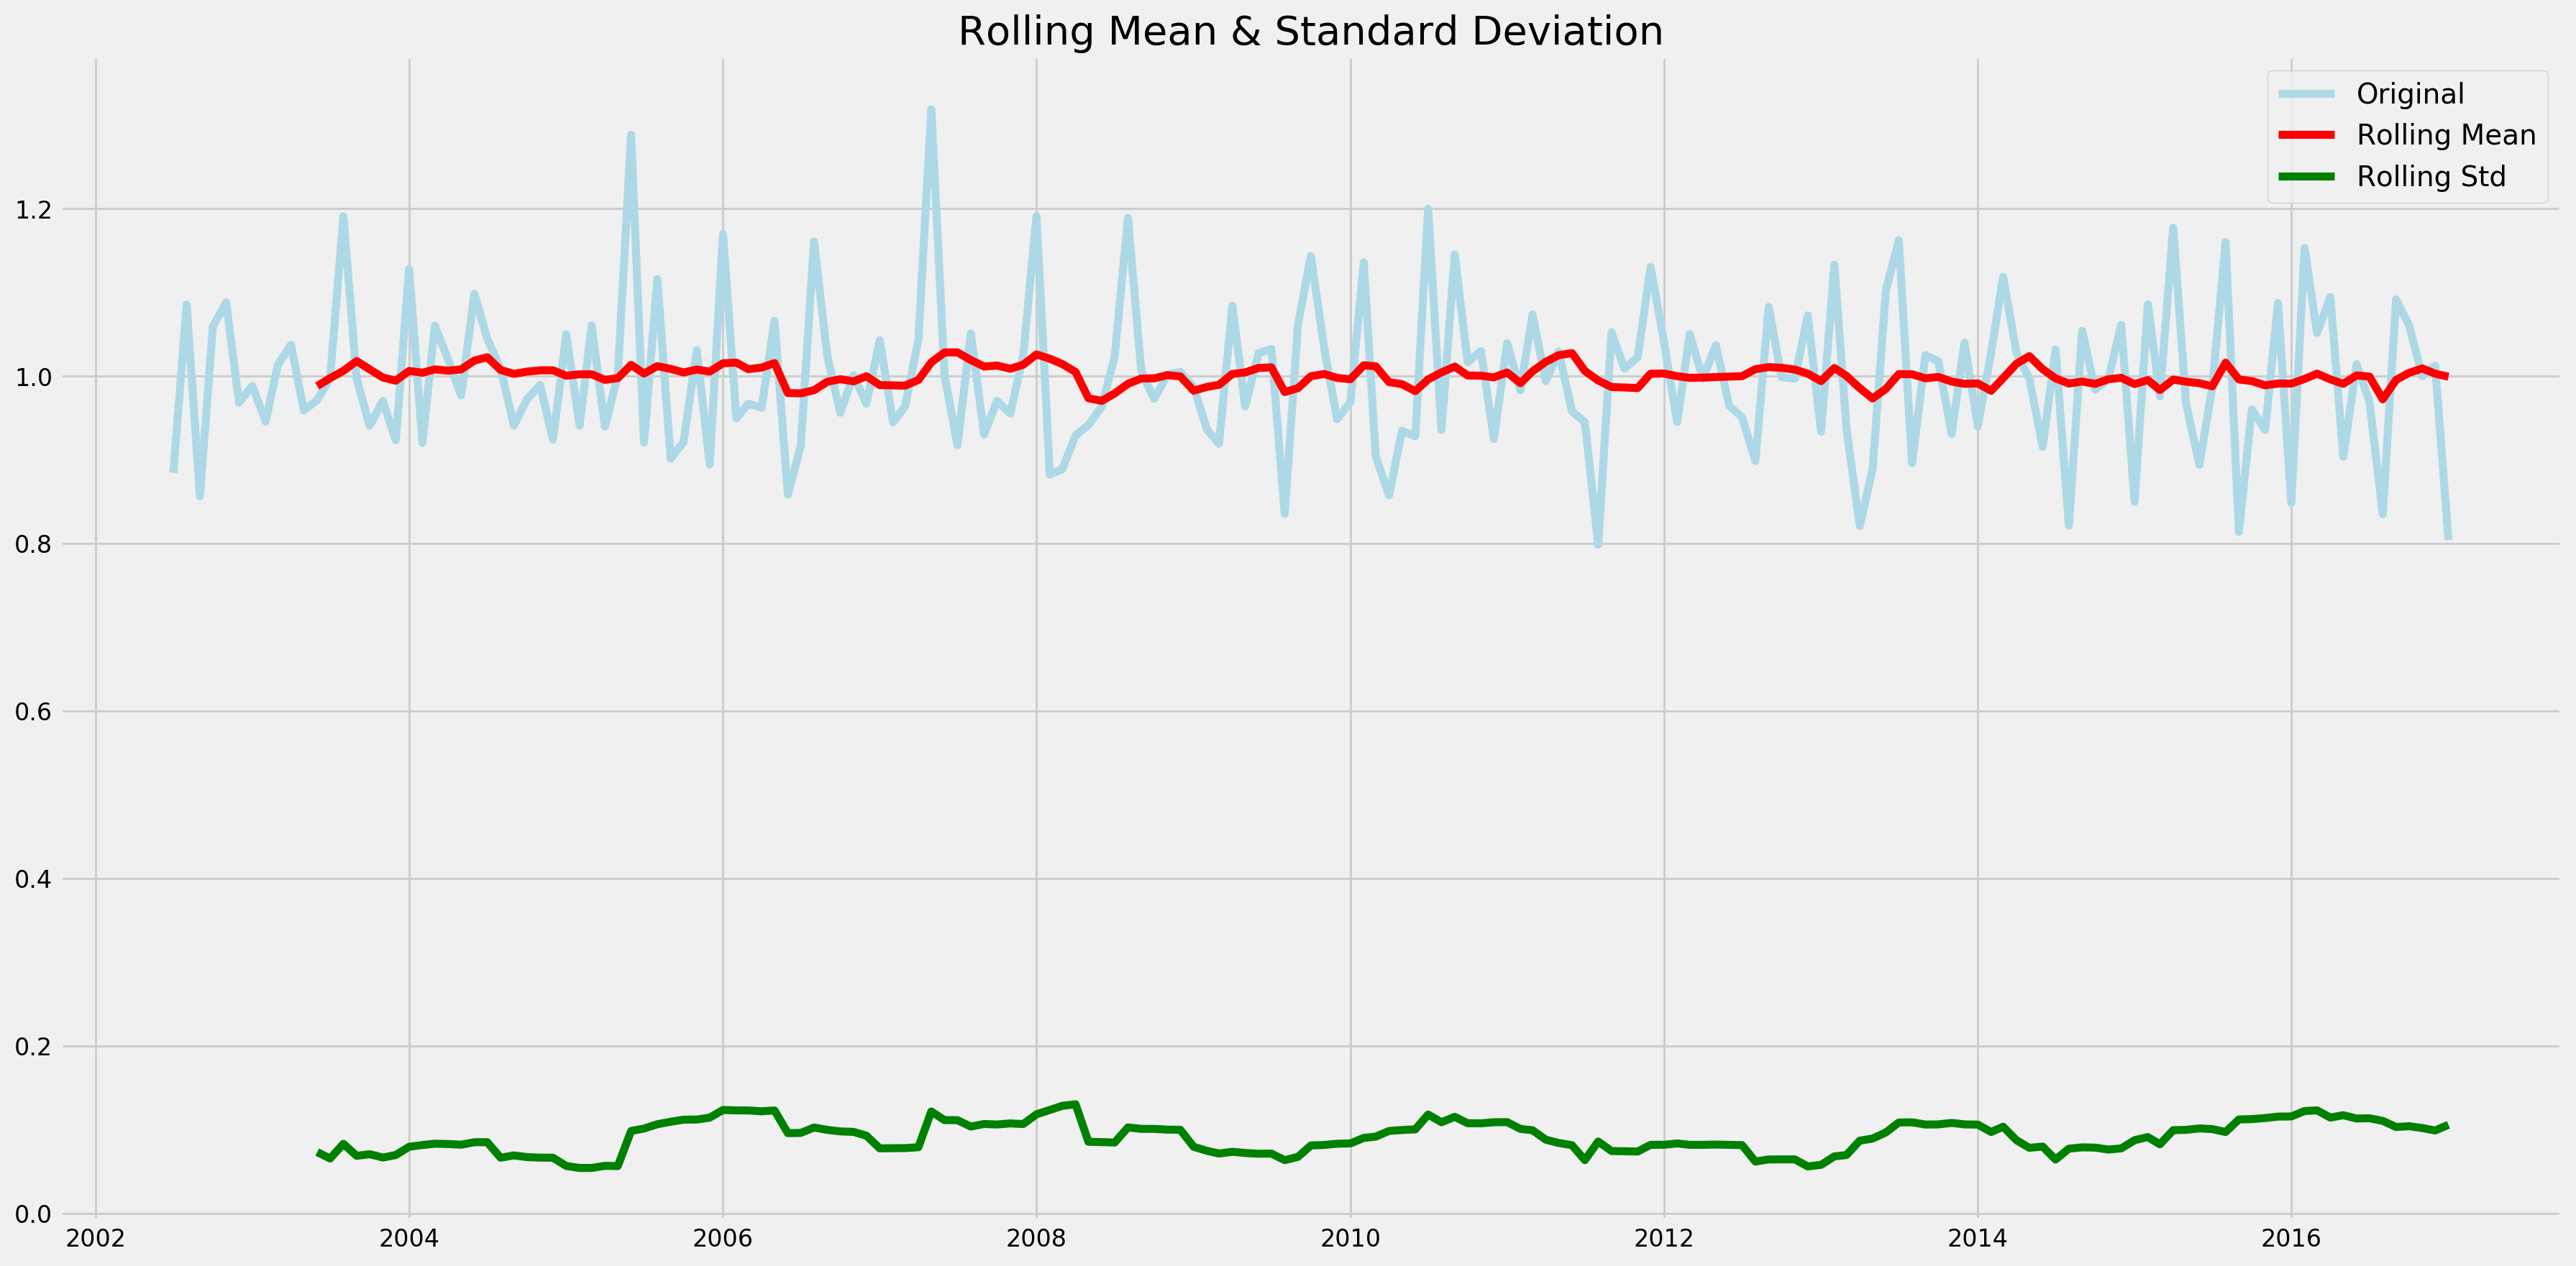

Results of Dickey-Fuller Test:
Test Statistic                -6.923224e+00
p-value                        1.132398e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.620000e+02
Critical Value (1%)           -3.471374e+00
Critical Value (5%)           -2.879552e+00
Critical Value (10%)          -2.576373e+00
dtype: float64


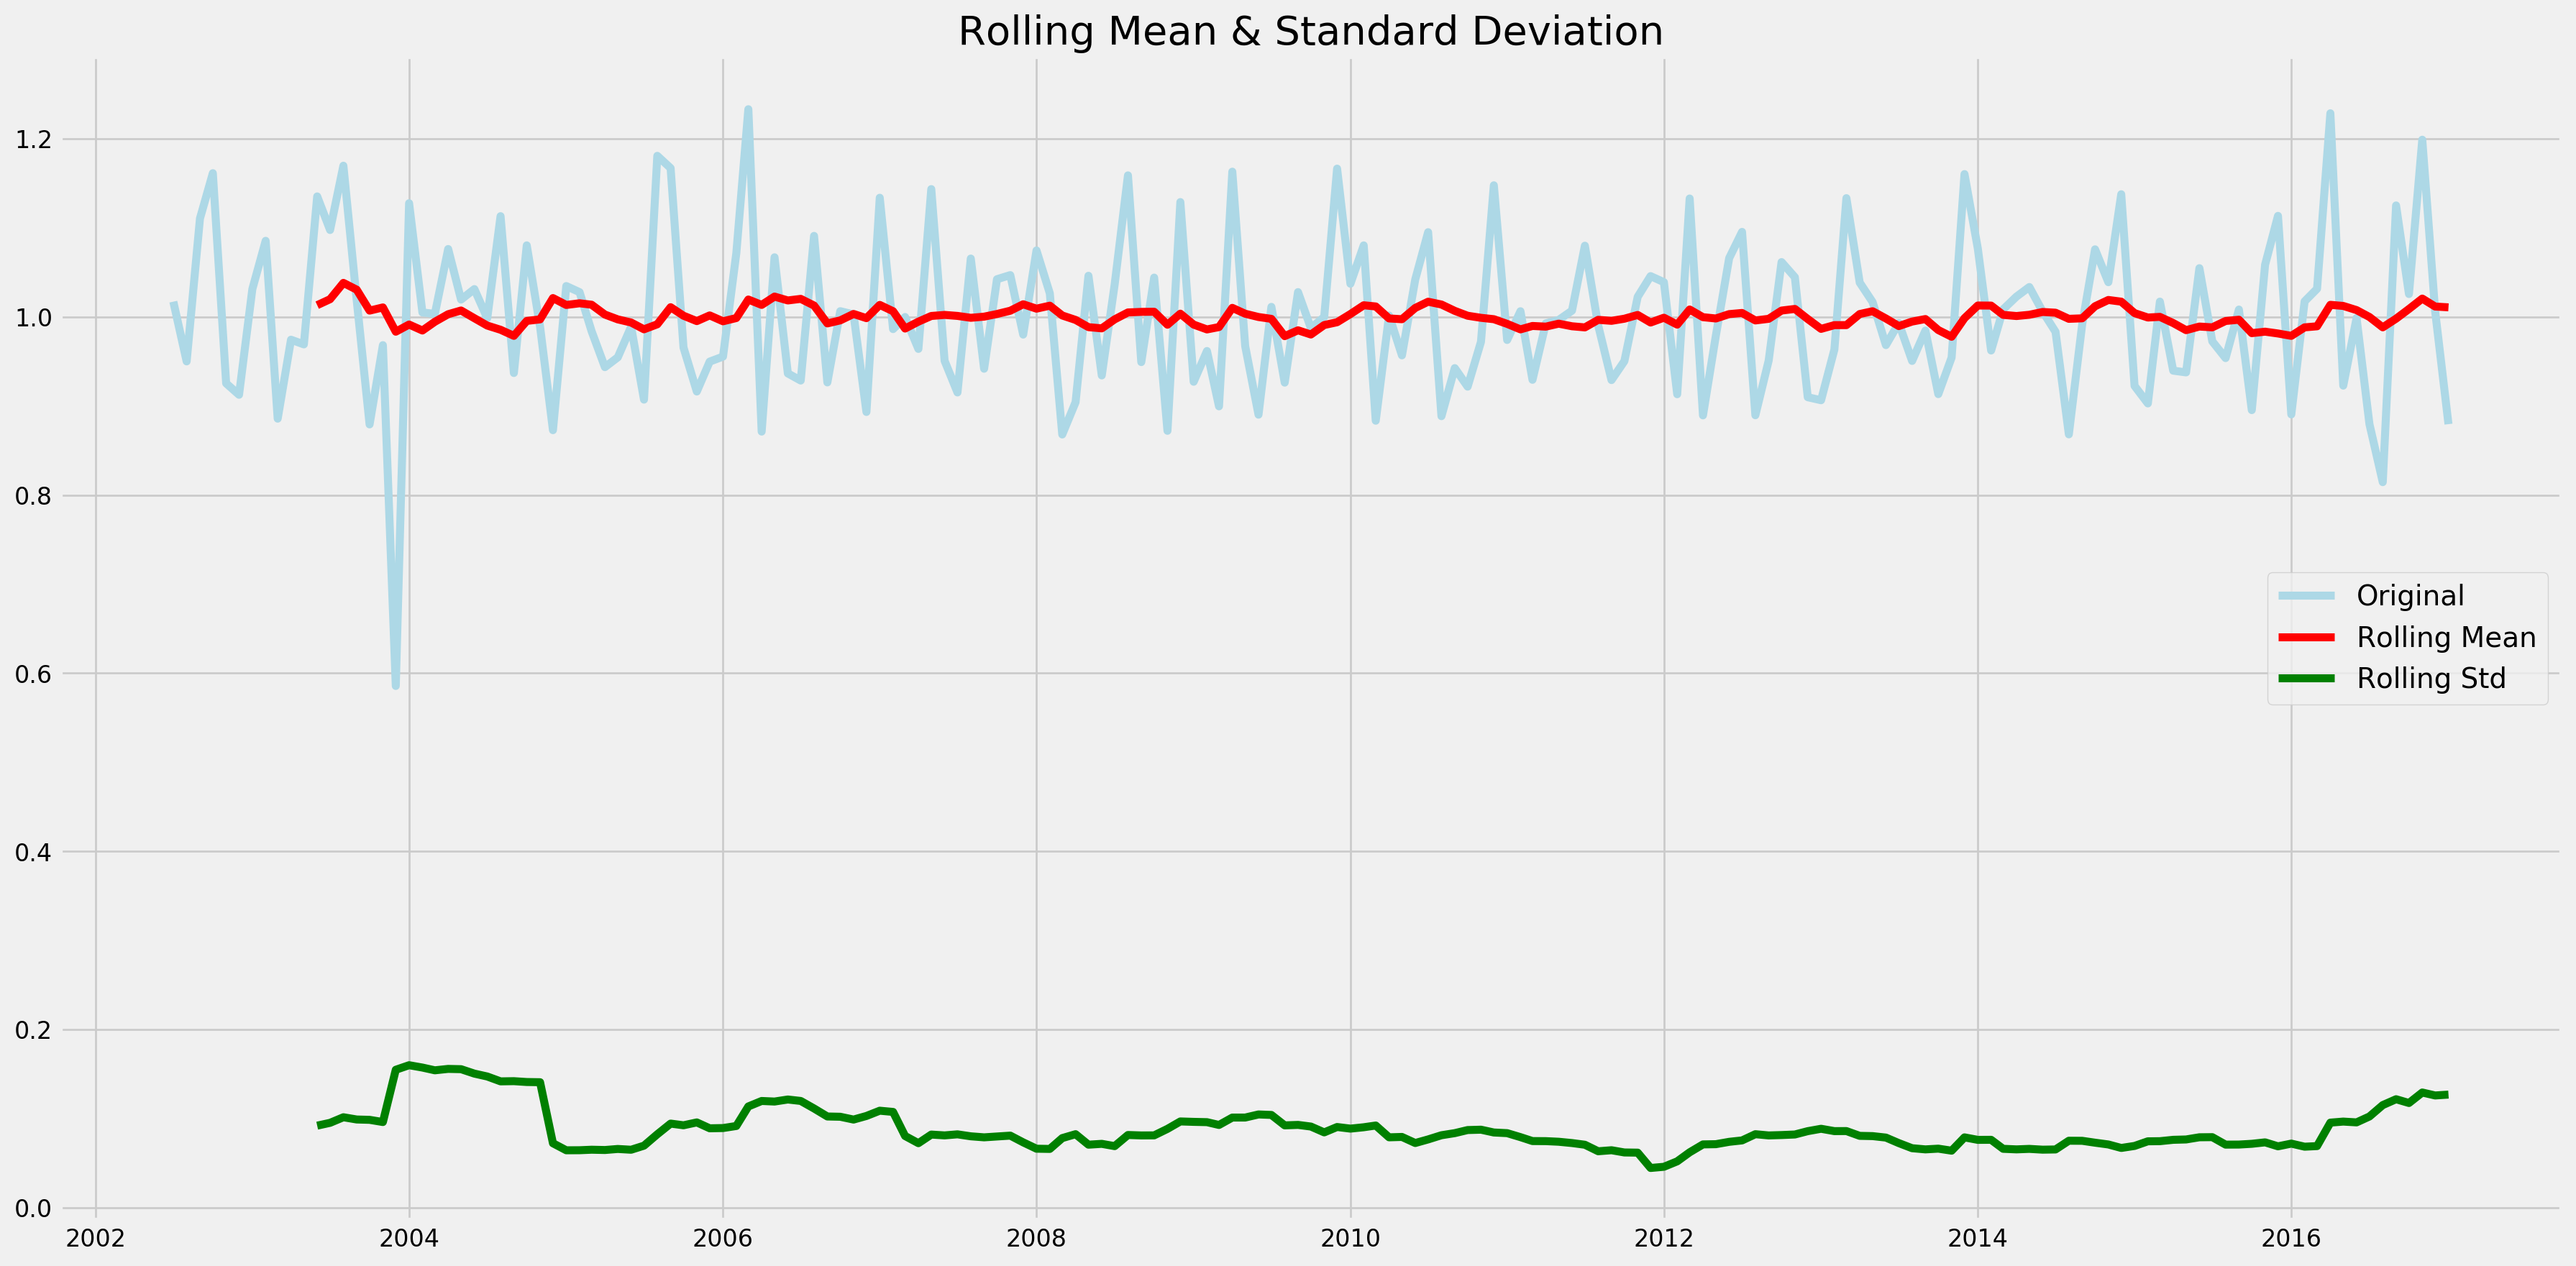

Results of Dickey-Fuller Test:
Test Statistic                -6.153439e+00
p-value                        7.466324e-08
#Lags Used                     1.300000e+01
Number of Observations Used    1.610000e+02
Critical Value (1%)           -3.471633e+00
Critical Value (5%)           -2.879665e+00
Critical Value (10%)          -2.576434e+00
dtype: float64


In [19]:
tsar.dropna(inplace=True)
test_stationarity(tsar)
tsbr.dropna(inplace=True)
test_stationarity(tsbr)

## Formal test for Stationarity
After Augmented Dickey-Fuller Test on residuals the stats for both the item is as below.<br><br>
Item A:<br>
Results of Dickey-Fuller Test:<br>
Test Statistic:                -6.923224e+00<br>
p-value        :                1.132398e-09<br>
Lags Used      :               1.200000e+01<br>
Number of Observations Used   : 1.620000e+02<br>
Critical Value (1%)        :   -3.471374e+00<br>
Critical Value (5%)         :  -2.879552e+00<br>
Critical Value (10%)         : -2.576373e+00<br>
<br>
Item B:<br>
Results of Dickey-Fuller Test:<br>
Test Statistic:                -6.153439e+00<br>
p-value         :                7.466324e-08<br>
Lags Used       :               1.300000e+01<br>
Number of Observations Used :    1.610000e+02<br>
Critical Value (1%)      :      -3.471633e+00<br>
Critical Value (5%)     :      -2.879665e+00<br>
Critical Value (10%)     :      -2.576434e+00<br>
<br>
As we have p-value way below 5%.<br>
Hence we can conclude the it is stationary series now.

***
##  5. Before the final forecast is undertaken one would like to compare a few models. Use the last 21 months as hold-out sample fit a suitable exponential smoothing model to the rest of the data and calculate MAPE. What are the values of α, β and γ? What role do they play in the modeling? For the same hold-out period compare forecast by decomposition and compute MAPE. Which model gives smaller MAPE? Give a comparison for the two demands.

## Holt Winter Model

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_absolute_error , mean_squared_error
import statsmodels as sm
import numpy as np
import math
def mape(test,pred):
    y_true = np.array(test) 
    y_pred = np.array(pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def rmse(test,pred):
    rm = mean_squared_error(np.array(test), np.array(pred))
    return math.sqrt(rm)

In [21]:
tsatrain, tsatest = tsa[:166],tsa [166:]
tsbtrain, tsbtest = tsb[:166],tsb [166:]

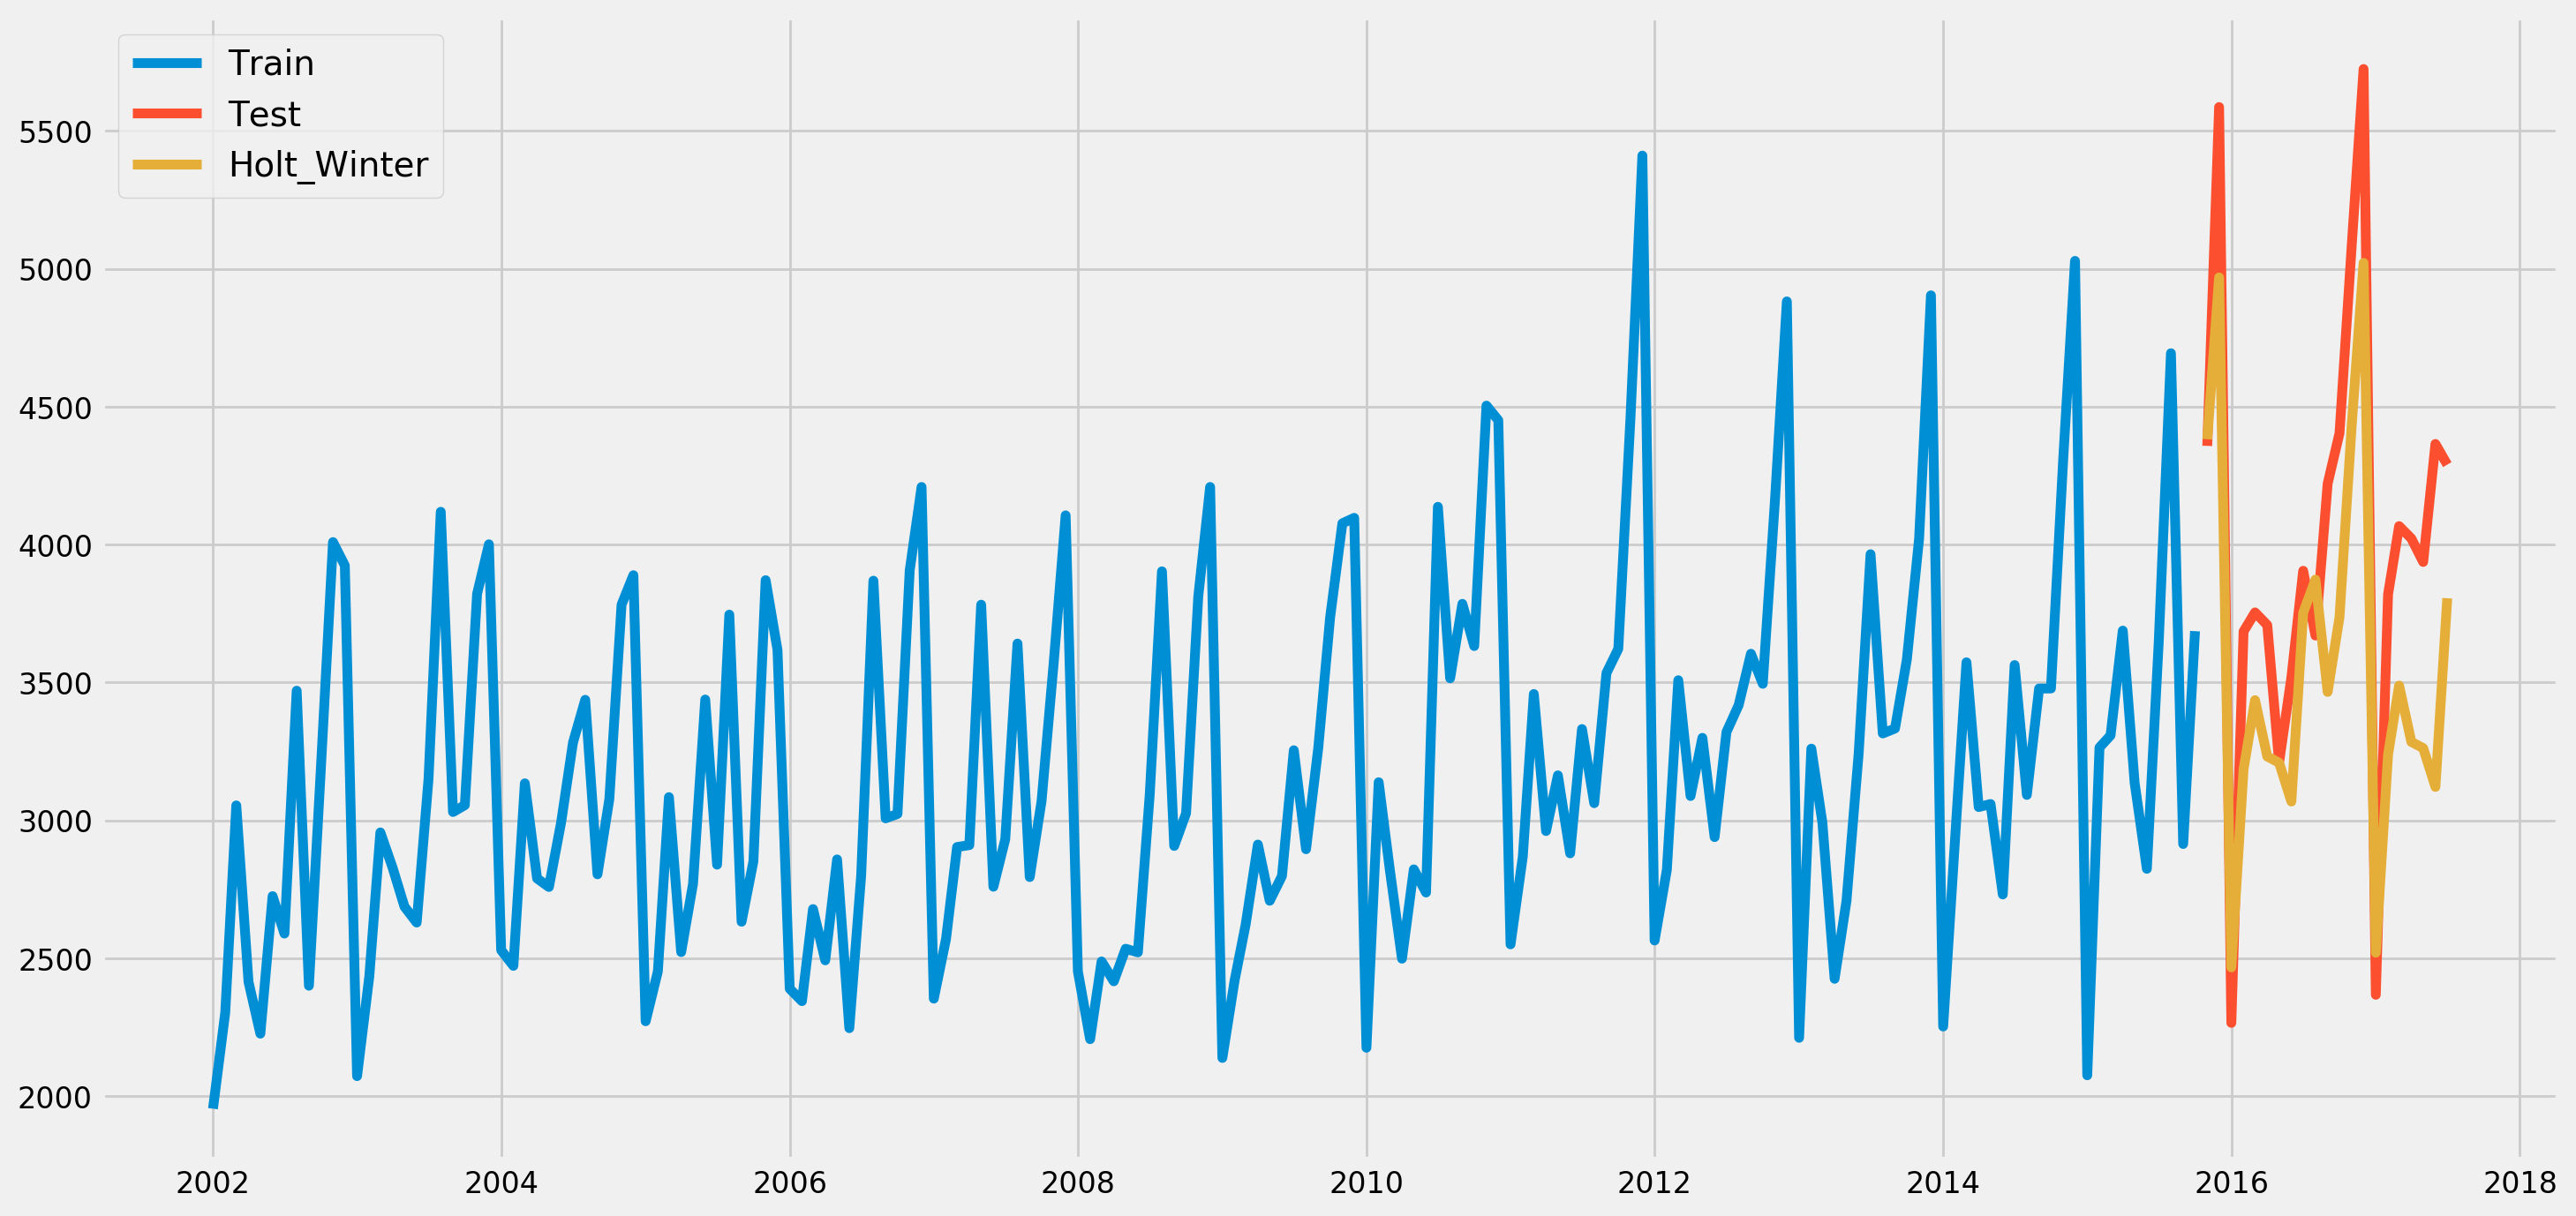

In [22]:
fit1 = ExponentialSmoothing(tsatrain,seasonal_periods=12 ,trend='add',seasonal='add').fit()
tsapred = fit1.forecast(len(tsatest))
plt.figure(figsize=(16,8))
plt.plot( tsatrain, label='Train')
plt.plot(tsatest, label='Test')
plt.plot(tsapred, label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [23]:
print(mape(tsatest,tsapred))
print(rmse(tsatest,tsapred))

11.759457736202277
563.9801882441305


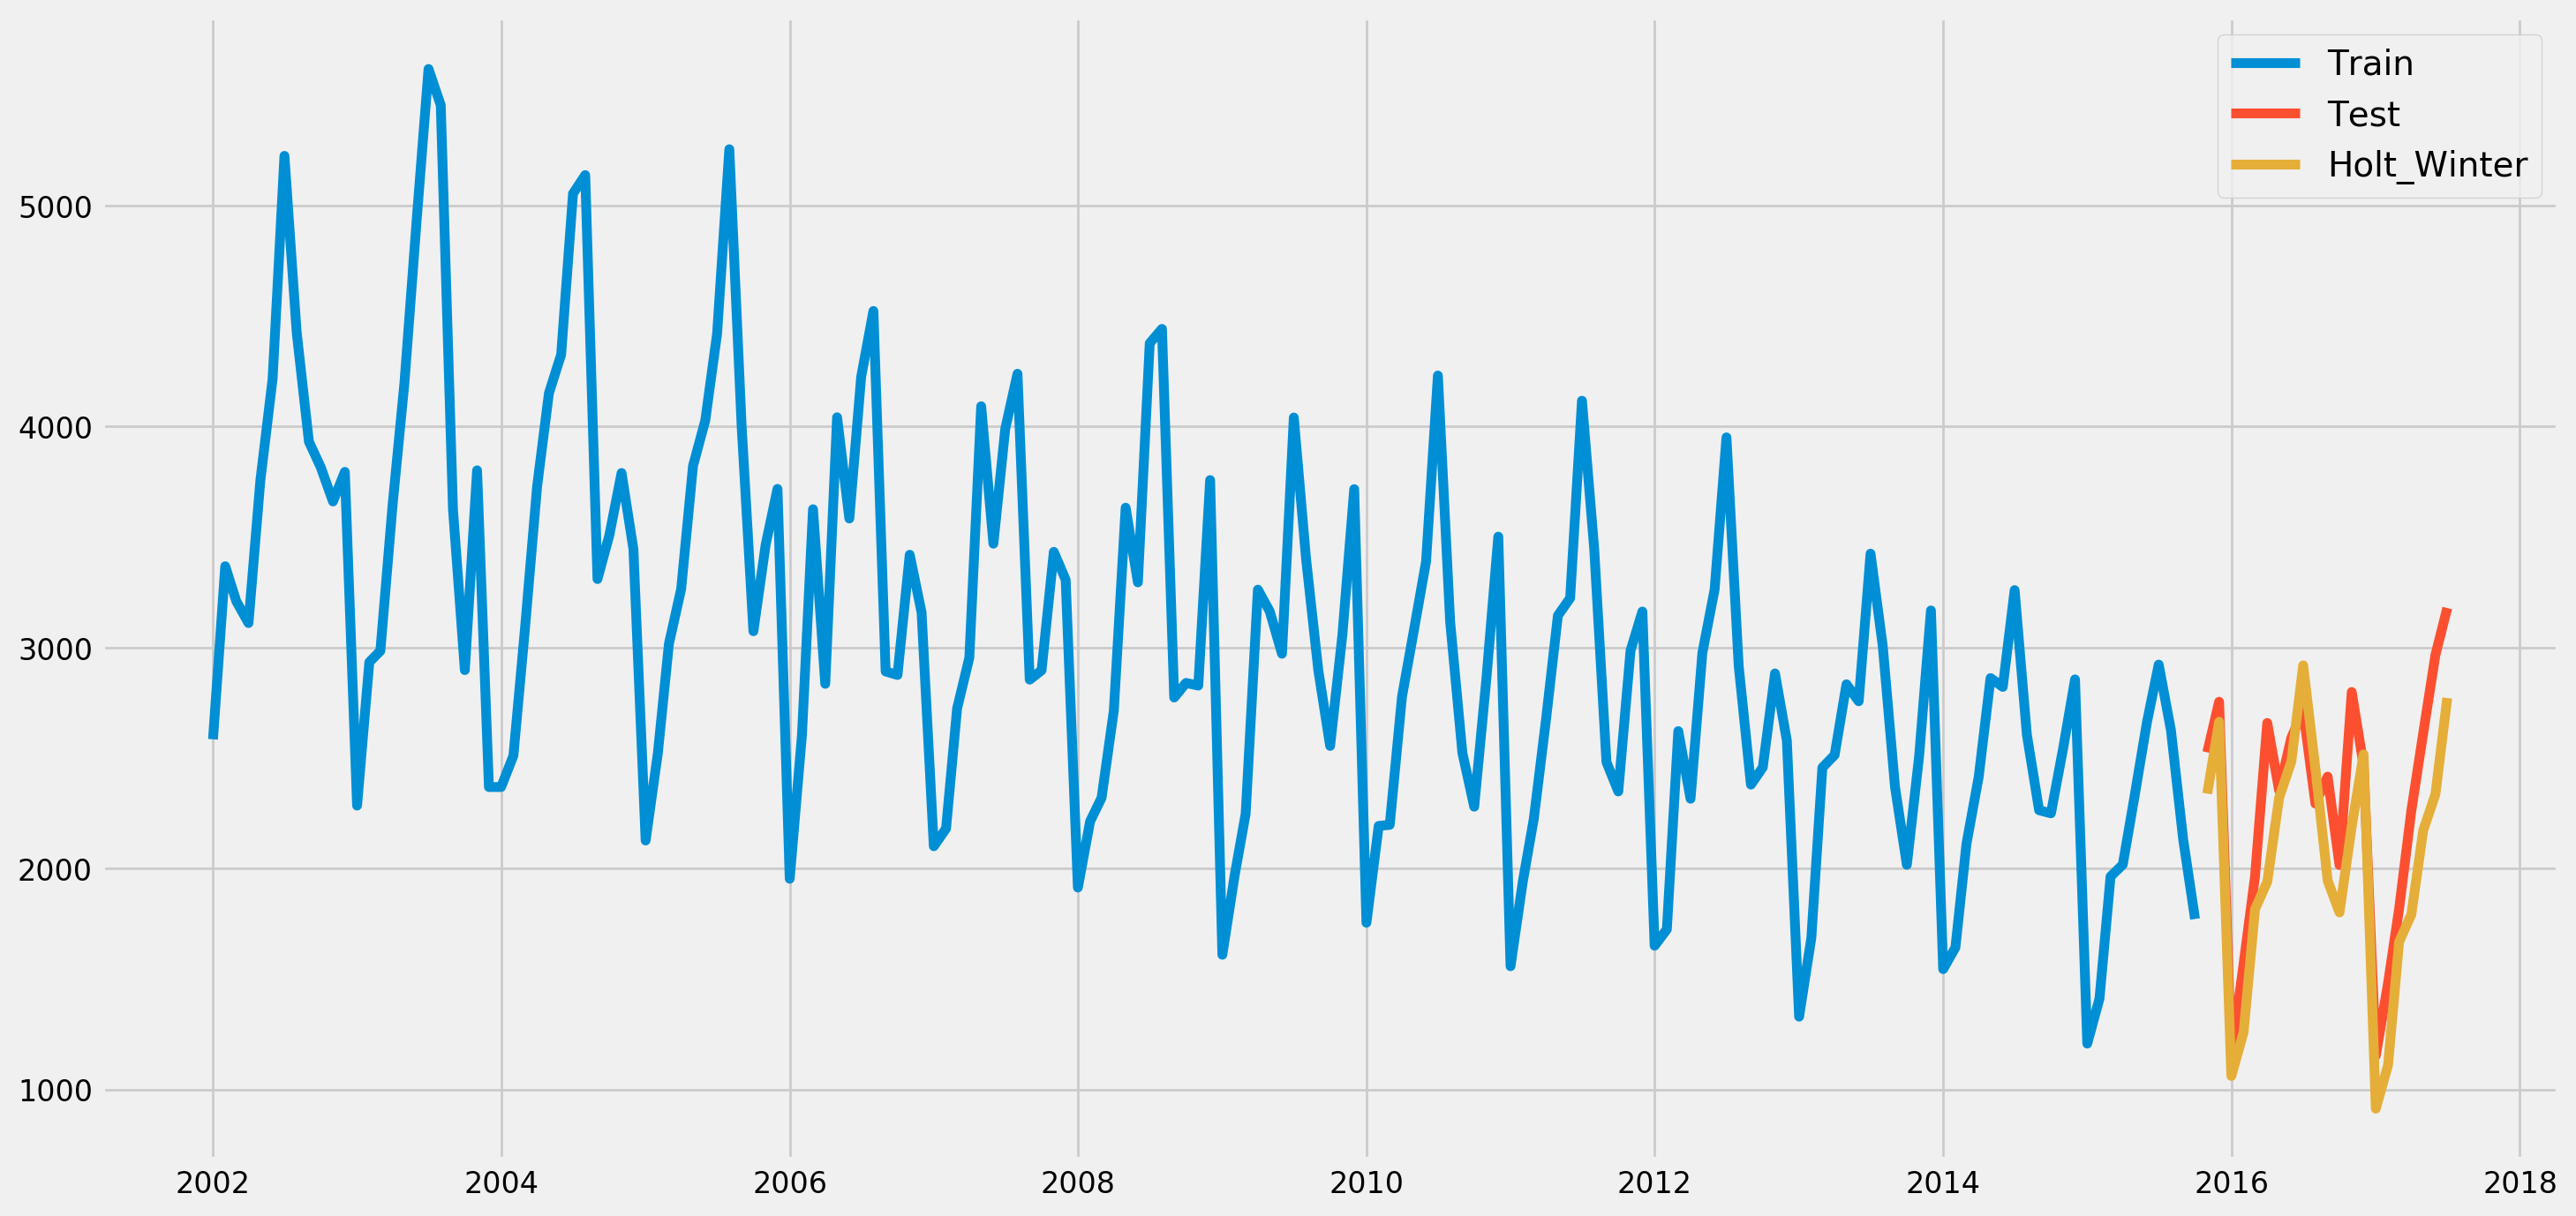

In [24]:
fit1 = ExponentialSmoothing(tsbtrain,seasonal_periods=12 ,trend='add',seasonal='add').fit()
tsbpred = fit1.forecast(len(tsbtest))
plt.figure(figsize=(16,8))
plt.plot( tsbtrain, label='Train')
plt.plot(tsbtest, label='Test')
plt.plot(tsbpred, label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [25]:
print(mape(tsbtest,tsbpred))
print(rmse(tsbtest,tsbpred))

12.975702978990617
351.7398472014022


fitarima = sm.tsa.statespace.SARIMAX(tsatrain, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
tsapredarima = fit1.predict(start="2015-11-01", end="2017-07-01", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( tsatrain, label='Train')
plt.plot(tsatest, label='Test')
plt.plot(tsapredarima, label='SARIMA')
plt.legend(loc='best')
plt.show()


tsbtest.index
tsatrain, tsatest

## ARIMA Model

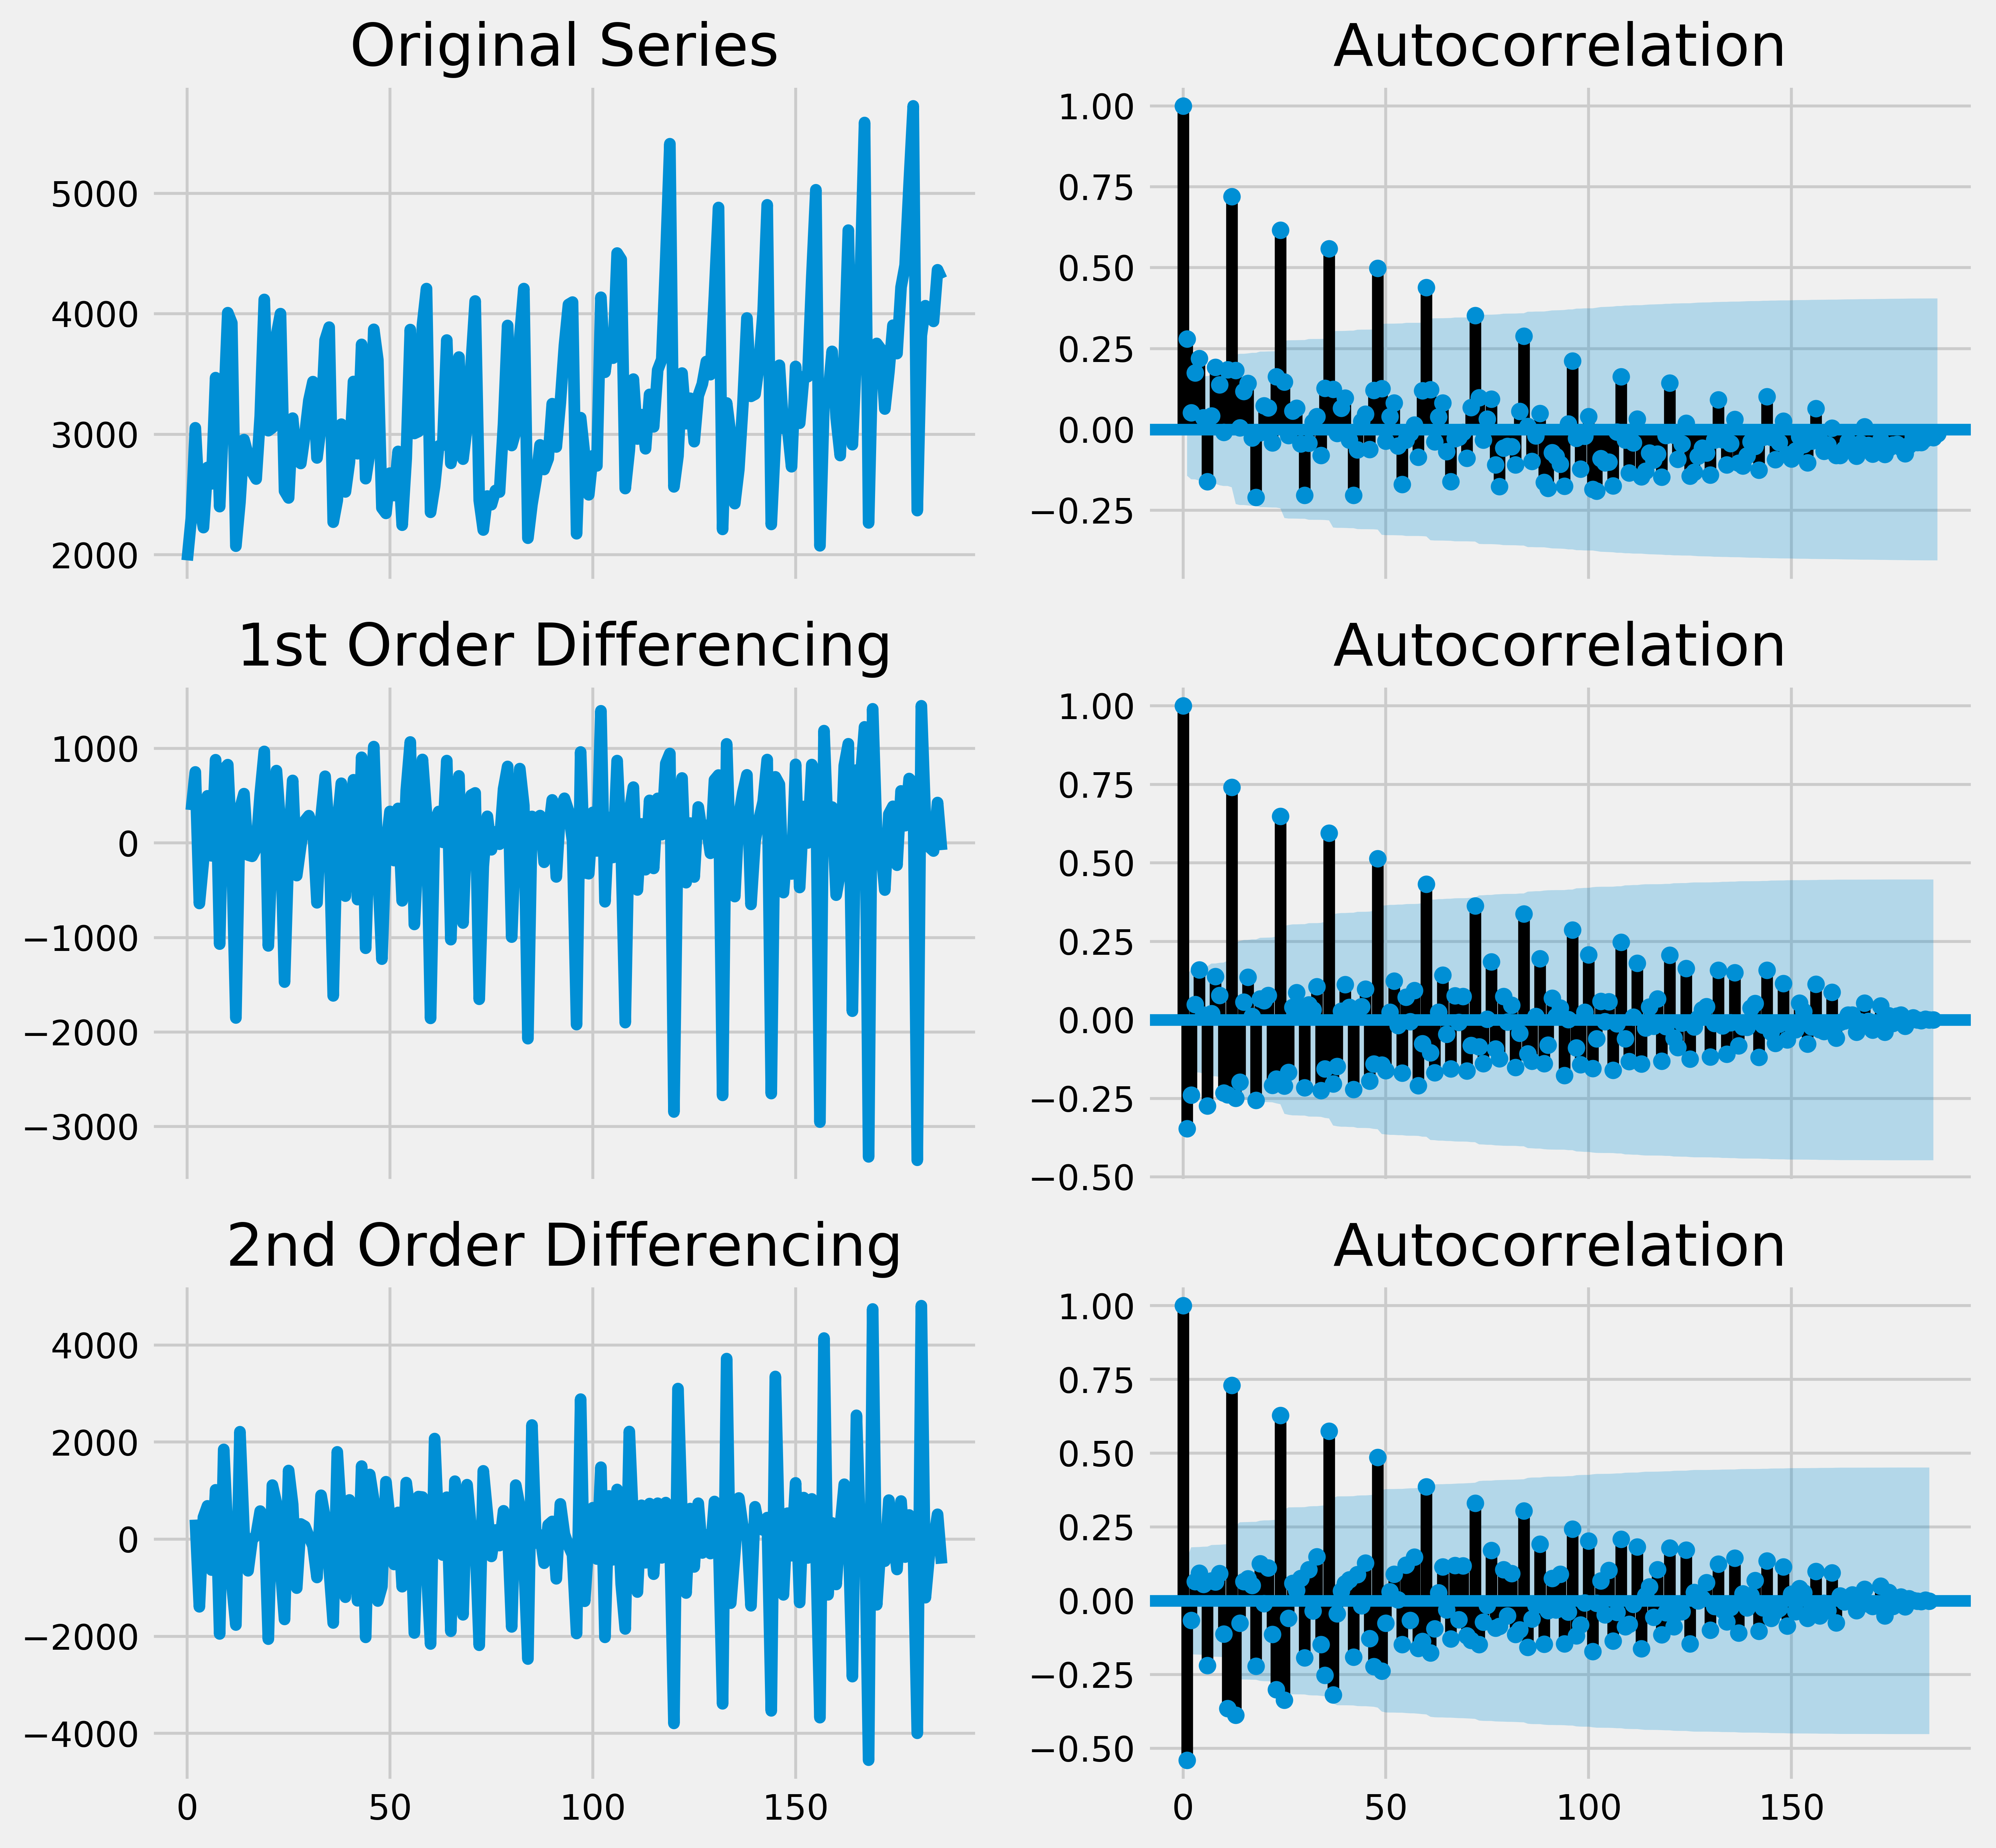

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':600})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(pd.DataFrame(tsa.array)); axes[0, 0].set_title('Original Series')
plot_acf(pd.DataFrame(tsa.array), ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(pd.DataFrame(tsa.array).diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(pd.DataFrame(tsa.array).diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(pd.DataFrame(tsa.array).diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(pd.DataFrame(tsa.array).diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [27]:
from pmdarima.arima.utils import *


## Adf Test
print(ndiffs(tsa, test='adf'))  # 2

# KPSS test
print(ndiffs(tsa, test='kpss') ) # 0

# PP test:
print(ndiffs(tsa, test='pp') ) # 2

c:\users\gusingev\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


0
1
0


c:\users\gusingev\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
#pip install scipy==1.2 --upgrade --user


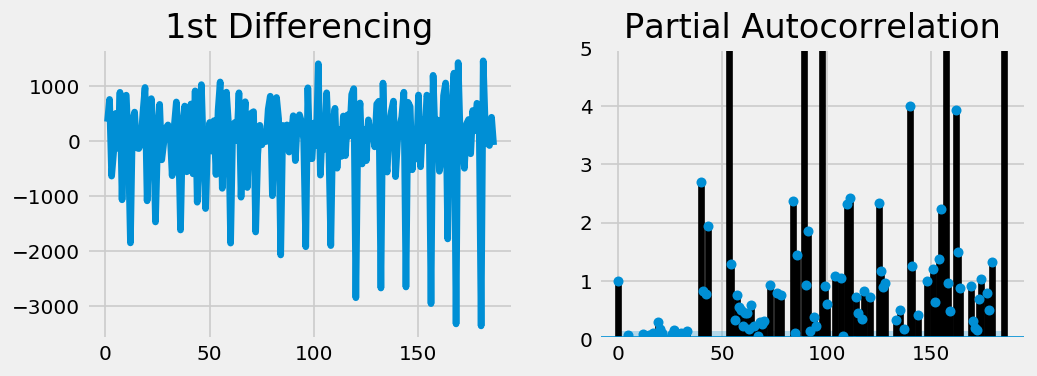

In [29]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(pd.DataFrame(tsa.array).diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(pd.DataFrame(tsa.array).diff().dropna(), ax=axes[1])

plt.show()

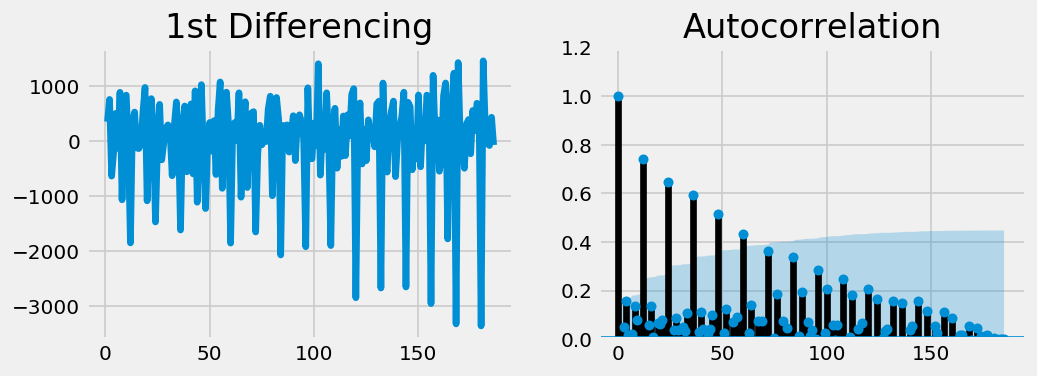

In [30]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(pd.DataFrame(tsa.array).diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(pd.DataFrame(tsa.array).diff().dropna(), ax=axes[1])

plt.show()

In [31]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(tsatrain, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Item A   No. Observations:                  165
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1294.759
Method:                       css-mle   S.D. of innovations            609.783
Date:                Fri, 07 Jun 2019   AIC                           2599.517
Time:                        23:57:31   BIC                           2615.047
Sample:                    02-01-2002   HQIC                          2605.821
                         - 10-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.0932      1.142      3.586      0.000       1.856       6.331
ar.L1.D.Item A    -0.4759      0.161     -2.964      0.004      -0.791      -0.161
ma.L1.D.Item A    -0.2915      0.127

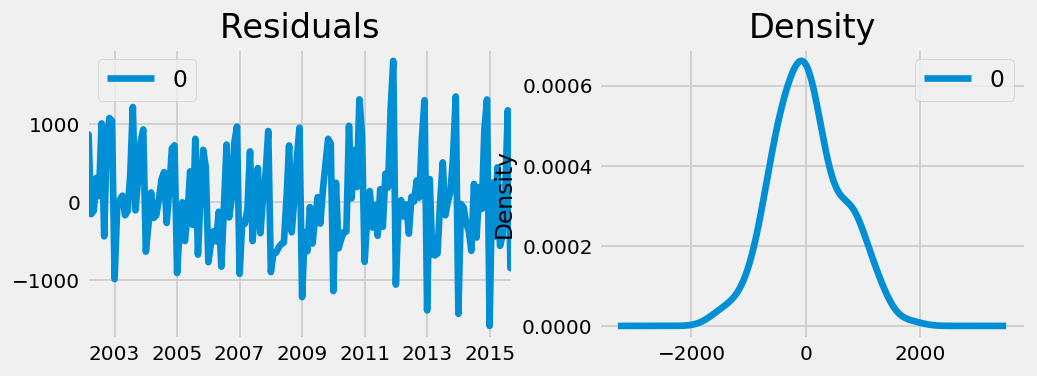

In [32]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

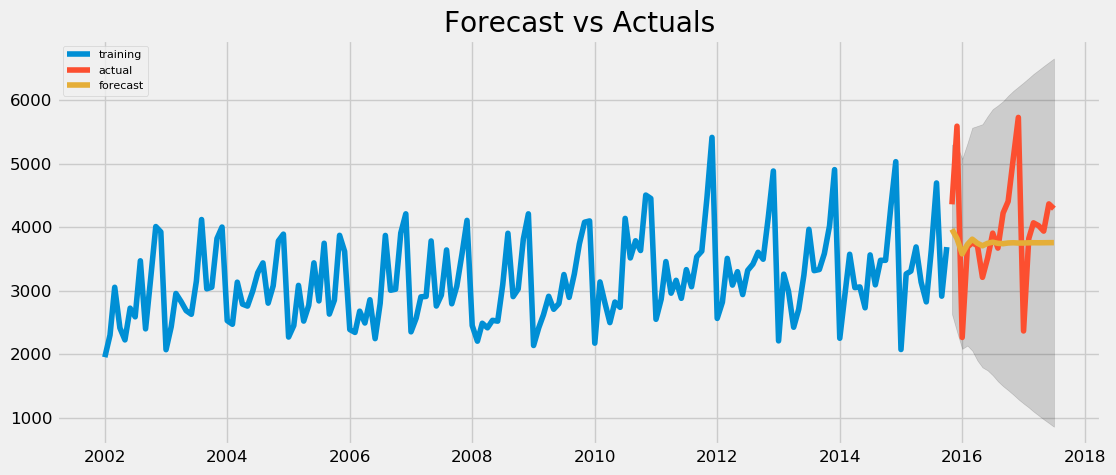

In [33]:
train=tsatrain
test=tsatest

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(21, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [34]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
                        # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,  
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.15353378860276617,
 'me': -242.2882407946784,
 'mae': 588.0724370605587,
 'mpe': -0.016360558007006483,
 'rmse': 829.3848815116788,
 'corr': 0.4711939513995834,
 'minmax': 0.131924024016418}

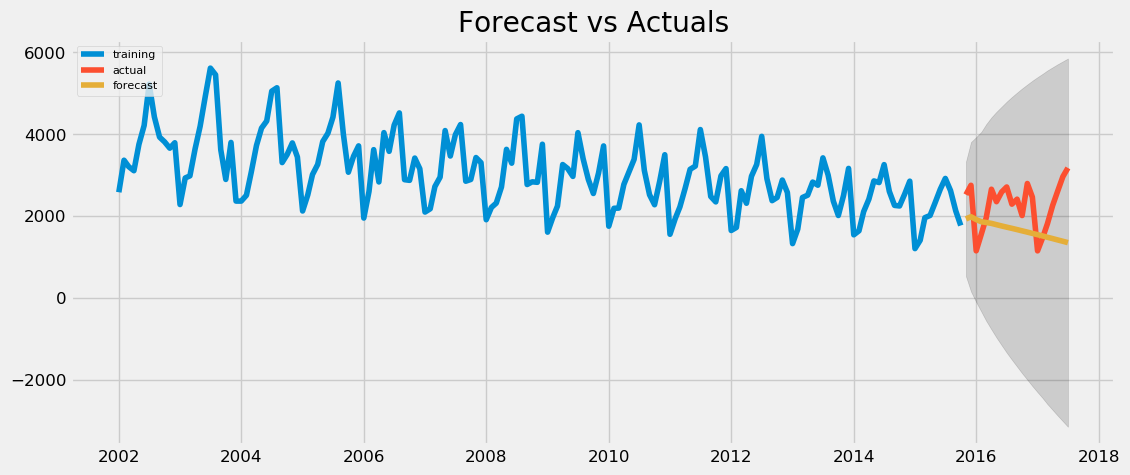

In [35]:
train=tsbtrain
test=tsbtest

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(21, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [36]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
                        # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,  
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.317359879259833,
 'me': -605.696476467131,
 'mae': 747.658570624508,
 'mpe': -0.20141133923332022,
 'rmse': 864.6729448715165,
 'corr': -0.17792845317175904,
 'minmax': 0.2991819751253667}

### Holt Winter Model gives best result

## 6. Use the ‘best’ model obtained from above to forecast demand for the period Oct 2017 to December 2018 for both items. Provide forecasted values as well as their upper and lower confidence limits. If you are the store manager what decisions would you make after looking at the demand of the two items over years?

### Values for Oct 2017 to December 2018


In [37]:
print(tsapred)
print(tsbpred)

2015-11-01    4381.969254
2015-12-01    4968.881550
2016-01-01    2466.741129
2016-02-01    3185.356005
2016-03-01    3435.695417
2016-04-01    3231.473166
2016-05-01    3208.824665
2016-06-01    3068.101155
2016-07-01    3752.447174
2016-08-01    3872.932988
2016-09-01    3465.561308
2016-10-01    3736.634796
2016-11-01    4434.867522
2016-12-01    5021.779817
2017-01-01    2519.639396
2017-02-01    3238.254272
2017-03-01    3488.593684
2017-04-01    3284.371434
2017-05-01    3261.722932
2017-06-01    3120.999423
2017-07-01    3805.345441
Freq: MS, dtype: float64
2015-11-01    2339.343068
2015-12-01    2664.475256
2016-01-01    1061.446055
2016-02-01    1259.142454
2016-03-01    1816.200484
2016-04-01    1940.395924
2016-05-01    2319.887994
2016-06-01    2484.534838
2016-07-01    2919.531958
2016-08-01    2451.130742
2016-09-01    1945.538241
2016-10-01    1801.530018
2016-11-01    2191.521490
2016-12-01    2516.653678
2017-01-01     913.624477
2017-02-01    1111.320876
2017-03-01   

## Conclusion
### I will keep increase the stock of Item A and reduce for Item B. Also will look to increase sale possible for Item B in lower and upper month to increase sales.